# Peak sensitivity analysis (ATAC)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import itertools as it
from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.odr import odrpack
import os
import glob

def init_grid(grid_dimensions: tuple, fig_dimensions: tuple, caption_height: int = 0, **kwargs) -> tuple:
    """ Initializes a grid of figures of correct dimension.

    To use this, please call plt.subplot(*grid_dimensions, next(counter)) before each figure to
    include in the grid

    Args:
        grid_dimensions: The dimension of grid (num rows, num columns)
        fig_dimensions: The dimension of each figure in the grid (width, height)
        caption_height: The height of the caption
        **kwargs: Additional arguments to pass to plt.figure

    Returns:
        tuple of (grid_dimensions, fig_dimensions, counter)

    """
    counter = it.count(1)
    plt.figure(figsize=(grid_dimensions[1] * fig_dimensions[0],
                        grid_dimensions[0] * fig_dimensions[1] + caption_height), **kwargs)
    return grid_dimensions, fig_dimensions, counter

In [ ]:
qnorm_rpkm_df = pd.read_csv("../../output/02-atac/01/cpm.tsv", sep=" ") # just use the cpm normalized peak count matrix
qnorm_rpkm_df

X1_HEK293T_P1A2_SP4_d100  \
HEK293T_P3A12_GFP_d100_peak_1                        1.588078   
HEK293T_P3A12_GFP_d100_peak_17                       6.087634   
HEK293T_P3G8_SPI1_d075_peak_6                        1.588078   
HEK293T_P1B6_SP4_d005_peak_3                         1.323399   
HEK293T_P3G7_SPI1_d100_peak_10                       2.382118   
...                                                       ...   
HEK293T_P3C3_KLF4_d075_peak_1358710                  0.529359   
HEK293T_P3E2_KLF1_d100_peak_1450983                  1.058719   
HEK293T_P3C3_KLF4_d075_peak_1358715                  1.323399   
HEK293T_P3A12_GFP_d100_peak_1824818                  1.852758   
HEK293T_P2D8_ALX4_d075_peak_271879                   0.529359   

                                     X2_HEK293T_P1B2_SP4_d100  \
HEK293T_P3A12_GFP_d100_peak_1                        0.877612   
HEK293T_P3A12_GFP_d100_peak_17                       8.995519   
HEK293T_P3G8_SPI1_d075_peak_6                        3.071641   
HEK293T_P1B6_SP4_d005_peak_3                         1.755223   
HEK293T_P3G7_SPI1_d100_peak_10                       0.877612   
...                                                       ...   
HEK293T_P3C3_KLF4_d075_peak_1358710                       NaN   
HEK293T_P3E2_KLF1_d100_peak_1450983                  0.438806   
HEK293T_P3C3_KLF4_d075_peak_1358715                  0.877612   
HEK293T_P3A12_GFP_d100_peak_1824818                  0.877612   
HEK293T_P2D8_ALX4_d075_peak_271879                   0.658209   

                                     X3_HEK293T_P1C2_ELF1_d100  \
HEK293T_P3A12_GFP_d100_peak_1                         0.877046   
HEK293T_P3A12_GFP_d100_peak_17                        8.989720   
HEK293T_P3G8_SPI1_d075_peak_6                         1.096307   
HEK293T_P1B6_SP4_d005_peak_3                          2.411876   
HEK293T_P3G7_SPI1_d100_peak_10                        2.850399   
...                                                        ...   
HEK293T_P3C3_KLF4_d075_peak_1358710                   0.877046   
HEK293T_P3E2_KLF1_d100_peak_1450983                   0.657784   
HEK293T_P3C3_KLF4_d075_peak_1358715                   0.438523   
HEK293T_P3A12_GFP_d100_peak_1824818                   1.534830   
HEK293T_P2D8_ALX4_d075_peak_271879                    1.096307   

                                     X4_HEK293T_P1D2_ELF1_d100  \
HEK293T_P3A12_GFP_d100_peak_1                         1.688634   
HEK293T_P3A12_GFP_d100_peak_17                        9.118624   
HEK293T_P3G8_SPI1_d075_peak_6                         1.688634   
HEK293T_P1B6_SP4_d005_peak_3                          3.714995   
HEK293T_P3G7_SPI1_d100_peak_10                        1.350907   
...                                                        ...   
HEK293T_P3C3_KLF4_d075_peak_1358710                   0.675454   
HEK293T_P3E2_KLF1_d100_peak_1450983                   0.337727   
HEK293T_P3C3_KLF4_d075_peak_1358715                   0.337727   
HEK293T_P3A12_GFP_d100_peak_1824818                   1.350907   
HEK293T_P2D8_ALX4_d075_peak_271879                    0.337727   

                                     X5_HEK293T_P1E2_FOXP1_d100  \
HEK293T_P3A12_GFP_d100_peak_1                          2.175640   
HEK293T_P3A12_GFP_d100_peak_17                         8.857964   
HEK293T_P3G8_SPI1_d075_peak_6                          2.175640   
HEK293T_P1B6_SP4_d005_peak_3                           3.263461   
HEK293T_P3G7_SPI1_d100_peak_10                         2.020237   
...                                                         ...   
HEK293T_P3C3_KLF4_d075_peak_1358710                         NaN   
HEK293T_P3E2_KLF1_d100_peak_1450983                    0.155403   
HEK293T_P3C3_KLF4_d075_peak_1358715                    0.621612   
HEK293T_P3A12_GFP_d100_peak_1824818                    1.709432   
HEK293T_P2D8_ALX4_d075_peak_271879                     1.243223   

                                     X6_HEK293T_P1F2_FOXP1_d100  \
HEK293T_P3A12_GFP

### inputs

In [16]:
group1 = "GFP_1" # reference level
region = "filteredConsensus"
TF = "KLF1"
group2 = TF+"_1"

In [ ]:
plotdir = "../../plots/02-atac/10/"
outdir = "../../output/02-atac/10/"
os.makedirs(plotdir, exist_ok=True)
os.makedirs(outdir, exist_ok=True)

In [ ]:
de = pd.read_csv(glob.glob(f"../../output/02-atac/04/deseq_data_Plate_TF_Dose/deseq_*{group2}_vs_*{group1}_{region}_full.tsv")[0], sep = "\t")
peaks = set(de.loc[(de["padj"] < 0.05) & (de["log2FoldChange"] > 0.58), "name"]) # only look at peaks that increase in accessibility

de.index = de.name
de["peakloc"] = de.seqnames + ": " + de.start.astype(str) + "-" + de.end.astype(str)
de

seqnames      start        end  width  \
name                                                                        
HEK293T_P3A12_GFP_d100_peak_1           chr1       9956      10456    501   
HEK293T_P3A12_GFP_d100_peak_17          chr1     778481     778981    501   
HEK293T_P3G8_SPI1_d075_peak_6           chr1     778998     779498    501   
HEK293T_P1B6_SP4_d005_peak_3            chr1     779568     780068    501   
HEK293T_P3G7_SPI1_d100_peak_10          chr1     826549     827049    501   
...                                      ...        ...        ...    ...   
HEK293T_P3C3_KLF4_d075_peak_1358710     chrX  155644326  155644826    501   
HEK293T_P3E2_KLF1_d100_peak_1450983     chrX  155656936  155657436    501   
HEK293T_P3C3_KLF4_d075_peak_1358715     chrX  155657579  155658079    501   
HEK293T_P3A12_GFP_d100_peak_1824818     chrX  155662298  155662798    501   
HEK293T_P2D8_ALX4_d075_peak_271879      chrX  155687337  155687837    501   

                                    strand  \
name                                         
HEK293T_P3A12_GFP_d100_peak_1            *   
HEK293T_P3A12_GFP_d100_peak_17           *   
HEK293T_P3G8_SPI1_d075_peak_6            *   
HEK293T_P1B6_SP4_d005_peak_3             *   
HEK293T_P3G7_SPI1_d100_peak_10           *   
...                                    ...   
HEK293T_P3C3_KLF4_d075_peak_1358710      *   
HEK293T_P3E2_KLF1_d100_peak_1450983      *   
HEK293T_P3C3_KLF4_d075_peak_1358715      *   
HEK293T_P3A12_GFP_d100_peak_1824818      *   
HEK293T_P2D8_ALX4_d075_peak_271879       *   

                                                                    name  \
name                                                                       
HEK293T_P3A12_GFP_d100_peak_1              HEK293T_P3A12_GFP_d100_peak_1   
HEK293T_P3A12_GFP_d100_peak_17            HEK293T_P3A12_GFP_d100_peak_17   
HEK293T_P3G8_SPI1_d075_peak_6              HEK293T_P3G8_SPI1_d075_peak_6   
HEK293T_P1B6_SP4_d005_peak_3                HEK293T_P1B6_SP4_d005_peak_3   
HEK293T_P3G7_SPI1_d100_peak_10            HEK293T_P3G7_SPI1_d100_peak_10   
...                                                                  ...   
HEK293T_P3C3_KLF4_d075_peak_1358710  HEK293T_P3C3_KLF4_d075_peak_1358710   
HEK293T_P3E2_KLF1_d100_peak_1450983  HEK293T_P3E2_KLF1_d100_peak_1450983   
HEK293T_P3C3_KLF4_d075_peak_1358715  HEK293T_P3C3_KLF4_d075_peak_1358715   
HEK293T_P3A12_GFP_d100_peak_1824818  HEK293T_P3A12_GFP_d100_peak_1824818   
HEK293T_P2D8_ALX4_d075_peak_271879    HEK293T_P2D8_ALX4_d075_peak_271879   

                                        score  score_norm  \
name                                                        
HEK293T_P3A12_GFP_d100_peak_1         4.80305    0.971143   
HEK293T_P3A12_GFP_d100_peak_17        7.97034    0.986195   
HEK293T_P3G8_SPI1_d075_peak_6         6.47870    0.698231   
HEK293T_P1B6_SP4_d005_peak_3          9.14194    0.876210   
HEK293T_P3G7_SPI1_d100_peak_10       13.83265    0.882565   
...                                       ...         ...   
HEK293T_P3C3_KLF4_d075_peak_1358710   3.56684    0.909159   
HEK293T_P3E2_KLF1_d100_peak_1450983   3.46814    0.912371   
HEK293T_P3C3_KLF4_d075_peak_1358715  10.16355    0.988850   
HEK293T_P3A12_GFP_d100_peak_1824818   3.35455    0.944737   
HEK293T_P2D8_ALX4_d075_peak_271879   33.18583    0.976988   

                                                       sampleId   baseMean  \
name                                                                         
HEK293T_P3A12_GFP_d100_peak_1        409_HEK293T_P3A12_GFP_d100   4.632441   
HEK293T_P3A12_GFP_d100_peak_17       409_HEK293T_P3A12_GFP_d100  24.426605   
HEK293T_P3G8_SPI1_d075_peak_6        383_HEK293T_P3G8_SPI1_d075   4.542664   
HEK293T_P1B6_SP4_d005_peak_3           34_HEK293T_P1B6_SP4_d005   5.996549   
HEK293T_P3G7_SPI1_d100_peak_10       375_HEK293T_P3G7_SPI1_d100   4.271981   
...                                                         ...        ...   
HEK293T_P3C3_KLF4_d075_peak_

In [18]:
# test code
# peaks = ['SPI1_100_rep1_peak_223807c', 'SPI1_100_rep1_peak_357926',
         # 'SPI1_100_rep2_peak_20934', "SPI1_005_rep1_peak_71974b", "GATA1_025_rep2_peak_317453"]

In [19]:
subset = qnorm_rpkm_df.loc[peaks, qnorm_rpkm_df.columns.str.contains(TF) | qnorm_rpkm_df.columns.str.contains("GFP")]
subset.columns = subset.columns.str.lstrip('X')
subset[pd.isna(subset)]=0
subset

/tmp/ipykernel_88563/3233971106.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  subset = qnorm_rpkm_df.loc[peaks, qnorm_rpkm_df.columns.str.contains(TF) | qnorm_rpkm_df.columns.str.contains("GFP")]


81_HEK293T_P1A12_GFP_d100  \
HEK293T_P2E8_TCF3_d075_peak_181800                    1.466495   
HEK293T_P3D3_KLF4_d075_peak_384467                    3.666237   
HEK293T_P3D3_KLF4_d075_peak_170674                    0.733247   
HEK293T_P3H2_KLF1_d100_peak_678939                    0.733247   
HEK293T_P3F2_KLF1_d100_peak_524956                    0.366624   
...                                                        ...   
HEK293T_P3G3_KLF1_d075_peak_1328494                   1.099871   
HEK293T_P3H2_KLF1_d100_peak_314455                    1.099871   
HEK293T_P3D3_KLF4_d075_peak_501638                    1.833119   
HEK293T_P2E9_TCF3_d050_peak_34539a                    0.733247   
HEK293T_P3F2_KLF1_d100_peak_733258                    0.366624   

                                     82_HEK293T_P1B12_GFP_d100  \
HEK293T_P2E8_TCF3_d075_peak_181800                    1.370303   
HEK293T_P3D3_KLF4_d075_peak_384467                    3.719393   
HEK293T_P3D3_KLF4_d075_peak_170674                    0.978788   
HEK293T_P3H2_KLF1_d100_peak_678939                    1.761818   
HEK293T_P3F2_KLF1_d100_peak_524956                    0.587273   
...                                                        ...   
HEK293T_P3G3_KLF1_d075_peak_1328494                   1.566060   
HEK293T_P3H2_KLF1_d100_peak_314455                    0.783030   
HEK293T_P3D3_KLF4_d075_peak_501638                    0.391515   
HEK293T_P2E9_TCF3_d050_peak_34539a                    1.566060   
HEK293T_P3F2_KLF1_d100_peak_733258                    0.587273   

                                     245_HEK293T_P2A12_GFP_d100  \
HEK293T_P2E8_TCF3_d075_peak_181800                     2.186964   
HEK293T_P3D3_KLF4_d075_peak_384467                     4.009435   
HEK293T_P3D3_KLF4_d075_peak_170674                     0.364494   
HEK293T_P3H2_KLF1_d100_peak_678939                     1.093482   
HEK293T_P3F2_KLF1_d100_peak_524956                     0.000000   
...                                                         ...   
HEK293T_P3G3_KLF1_d075_peak_1328494                    2.186964   
HEK293T_P3H2_KLF1_d100_peak_314455                     1.093482   
HEK293T_P3D3_KLF4_d075_peak_501638                     0.364494   
HEK293T_P2E9_TCF3_d050_peak_34539a                     1.457976   
HEK293T_P3F2_KLF1_d100_peak_733258                     1.457976   

                                     246_HEK293T_P2B12_GFP_d100  \
HEK293T_P2E8_TCF3_d075_peak_181800                     2.209557   
HEK293T_P3D3_KLF4_d075_peak_384467                     3.314335   
HEK293T_P3D3_KLF4_d075_peak_170674                     0.000000   
HEK293T_P3H2_KLF1_d100_peak_678939                     2.761946   
HEK293T_P3F2_KLF1_d100_peak_524956                     0.828584   
...                                                         ...   
HEK293T_P3G3_KLF1_d075_peak_1328494                    1.933362   
HEK293T_P3H2_KLF1_d100_peak_314455                     0.552389   
HEK293T_P3D3_KLF4_d075_peak_501638                     0.276195   
HEK293T_P2E9_TCF3_d050_peak_34539a                     0.828584   
HEK293T_P3F2_KLF1_d100_peak_733258                     1.104778   

                                     333_HEK293T_P3E2_KLF1_d100  \
HEK293T_P2E8_TCF3_d075_peak_181800                     3.333422   
HEK293T_P3D3_KLF4_d075_peak_384467                     5.000133   
HEK293T_P3D3_KLF4_d075_peak_170674                     4.166778   
HEK293T_P3H2_KLF1_d100_peak_678939                     4.166778   
HEK293T_P3F2_KLF1_d100_peak_524956                     3.333422   
...                                                         ...   
HEK293T_P3G3_KLF1_d075_peak_1328494                    5.000133   
HEK293T_P3H2_KLF1_d100_peak_314455                    10.000267   
HEK293T_P3D3_KLF4_d075_peak_501638                     5.833489   
HEK293T_P2E9_TCF3_d050_peak_34539a                     2.500067   
HEK293T_P3F2_KLF1_d100_peak_733258                     4.166778   

                                    

In [ ]:
metadata = pd.read_csv("atac_sample_sheet.txt", sep="\t")
metadata.loc[metadata.TF=="GFP","Plasmid_Dose"] = 0 # set control plasmid dose to zero
metadata.head()

sampleID  Plasmid_Dose  Replicate     TF Well CellType  PlateNum  TF_Dose  \
0         1           1.0          1    SP4   A2  HEK293T         1    SP4_1   
1         2           1.0          2    SP4   B2  HEK293T         1    SP4_1   
2         3           1.0          1   ELF1   C2  HEK293T         1   ELF1_1   
3         4           1.0          2   ELF1   D2  HEK293T         1   ELF1_1   
4         5           1.0          1  FOXP1   E2  HEK293T         1  FOXP1_1   

                  sampleName  \
0    1_HEK293T_P1A2_SP4_d100   
1    2_HEK293T_P1B2_SP4_d100   
2   3_HEK293T_P1C2_ELF1_d100   
3   4_HEK293T_P1D2_ELF1_d100   
4  5_HEK293T_P1E2_FOXP1_d100   

                                        peakFilename  \
0  /oak/stanford/groups/wjg/bliu/data/20240426_ro...   
1  /oak/stanford/groups/wjg/bliu/data/20240426_ro...   
2  /oak/stanford/groups/wjg/bliu/data/20240426_ro...   
3  /oak/stanford/groups/wjg/bliu/data/20240426_ro...   
4  /oak/stanford/groups/wjg/bliu/data/20240426_ro...   

                                     bamFilenameFull  
0  /oak/stanford/groups/wjg/bliu/data/20240426_ro...  
1  /oak/stanford/groups/wjg/bliu/data/20240426_ro...  
2  /oak/stanford/groups/wjg/bliu/data/20240426_ro...  
3  /oak/stanford/groups/wjg/bliu/data/20240426_ro...  
4  /oak/stanford/groups/wjg/bliu/data/20240426_ro...

In [21]:
dosage_dic = {metadata.loc[i, "sampleName"]: metadata.loc[i, "Plasmid_Dose"] 
              if metadata.loc[i, "TF"]!="GFP" else 0 for i in metadata.index}

In [22]:
metadata.index = metadata.sampleName
col_order = metadata.loc[subset.columns,].sort_values(by="Plasmid_Dose").index.tolist()

/oak/stanford/groups/wjg/bliu/software/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


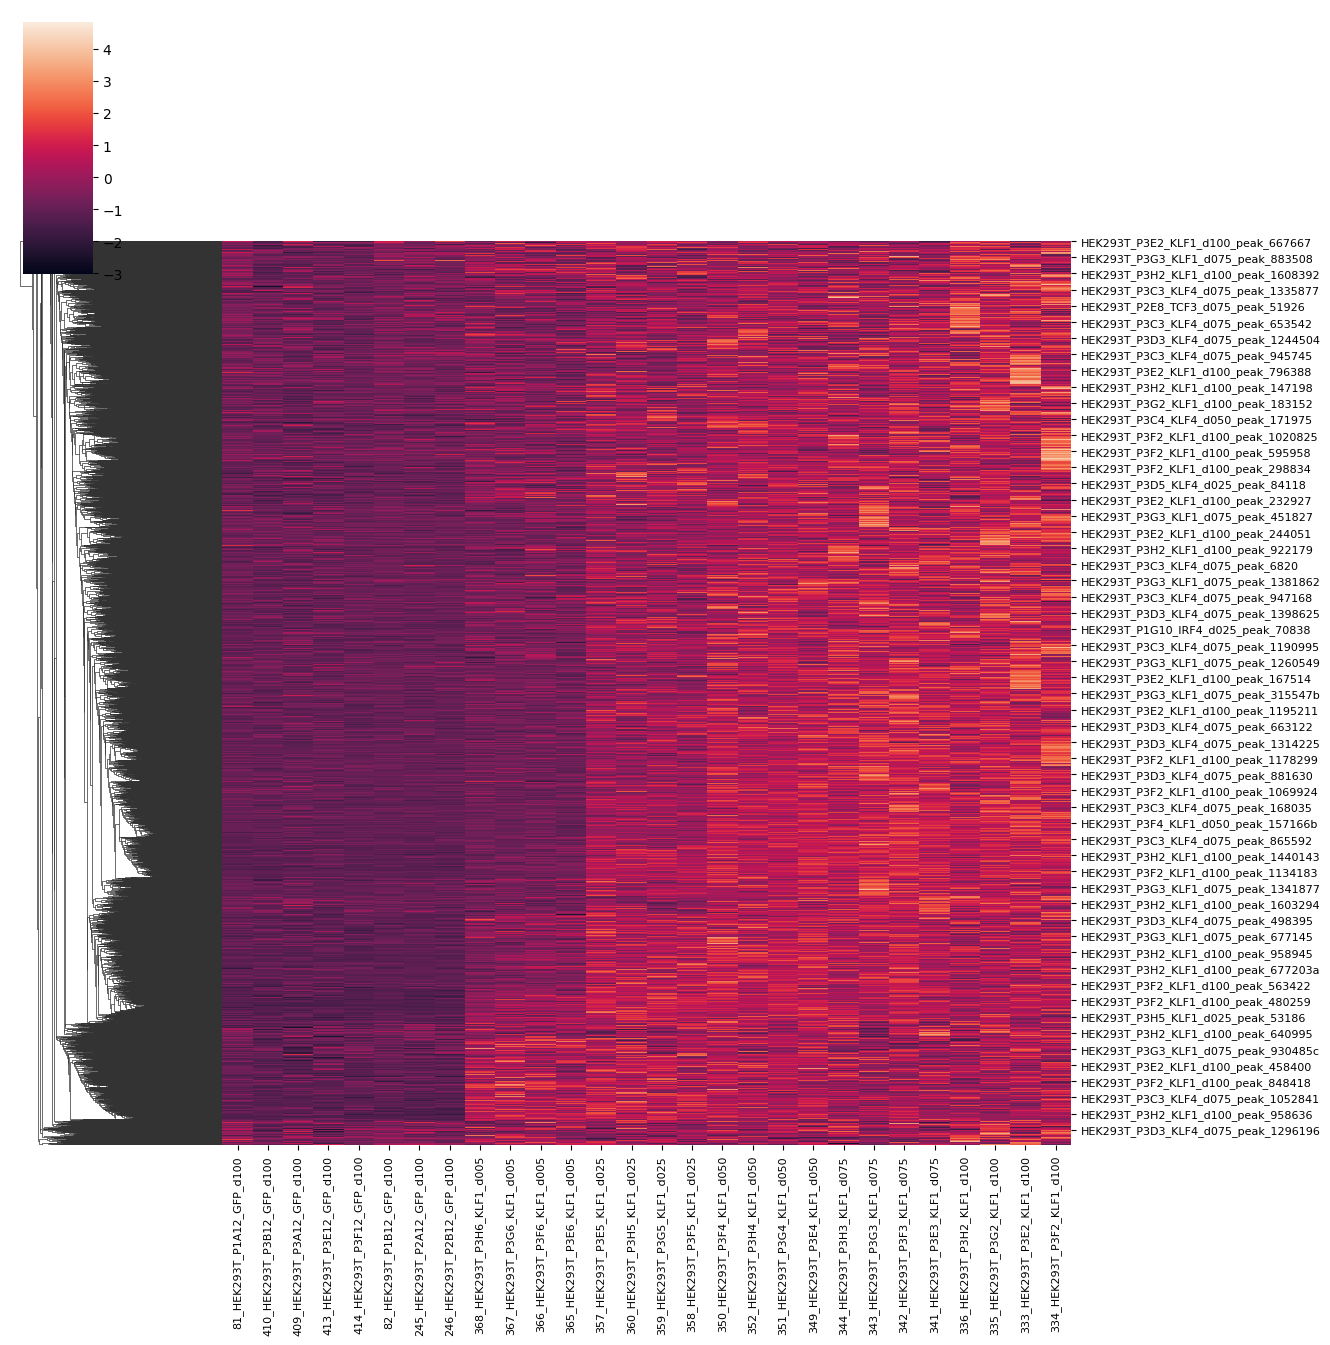

In [19]:
# g = sns.clustermap(subset[col_order], col_cluster = False, z_score=0, figsize=(14,14), rasterized=True)

# _ = plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)
# _ = plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)

In [ ]:
# # Rasterize the dendrograms
# for ax in g.ax_row_dendrogram, g.ax_col_dendrogram:
#     ax.set_rasterized(True)
# g.savefig(f"{plotdir}/heatmap_cpm_de_peaks_{TF}.pdf", dpi=100)

In [21]:
# # get the hierarchical clustering groups
# from scipy.cluster.hierarchy import fcluster
# row_linkage = np.array(g.dendrogram_row.linkage)
# n_groups = 4
# #row_clusters = fcluster(row_linkage, 4, criterion='maxclust')
# row_clusters = fcluster(row_linkage, 6, criterion='distance')


In [22]:
# lut = dict(zip(np.unique(row_clusters), "rbgmcyk"))
# row_colors = list(map(lambda n: lut[n], row_clusters))

# sns.clustermap(subset.iloc[row_order,][col_order], col_cluster = False, row_cluster = False, row_linkage=row_linkage, row_colors=row_colors, z_score=0, figsize=(14,14))

In [23]:
# # kmeans 
# from sklearn.cluster import KMeans

# data = subset
# inertias = []

# for i in range(1,10):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1,10), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [24]:
# k = 4
# kmeans = KMeans(n_clusters=k, max_iter=10000, n_init=500)
# kmeans.fit(data)

# # column annotate
# dose_sorted = metadata.loc[subset.columns,].sort_values(by="Plasmid_Dose").Plasmid_Dose

# # sorted
# labels = kmeans.labels_
# subset_sorted = subset.copy()
# subset_sorted["labels"] = labels
# subset_sorted = subset_sorted.sort_values(by="labels")
# labels_sorted = subset_sorted.labels
# subset_sorted = subset_sorted.drop(columns="labels")


# lut = dict(zip(np.unique(labels_sorted), "rbgmc"))
# lut2 = dict(zip(np.unique(dose_sorted), "kbcgymr"))
# row_colors = list(map(lambda n: lut[n], labels_sorted))
# col_colors = list(map(lambda n: lut2[n], dose_sorted))

In [25]:
# g = sns.clustermap(subset_sorted[col_order], col_cluster = False, row_cluster = False, z_score=0, row_colors=row_colors, col_colors=col_colors, 
#                     yticklabels=False, figsize=(8, 12))
# # Adjust xtick label size
# _ = plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)

### normalize counts 

In [100]:
r_save = subset[col_order].rename(columns = dosage_dic)
pdf_raw = r_save.reset_index().melt(id_vars = "index").rename(columns={"variable": "dose", "value": "normalized peak count"})

r_save = r_save.subtract(r_save[0].mean(axis = 1), axis =0) # control counts at 0
r_save = r_save.divide(r_save[1].mean(axis = 1), axis = 0) # highest dosage counts at 1
pdf = r_save.reset_index().melt(id_vars = "index").rename(columns={"variable": "dose", "value": "normalized peak count"})

In [53]:
pdf

index dose  normalized peak count
0        HEK293T_P2C2_LEF1_d100_peak_64274a  0.0               0.031665
1       HEK293T_P3A9_SOX2_d050_peak_199192b  0.0              -0.042056
2       HEK293T_P1D3_ELF1_d075_peak_187393a  0.0              -0.976090
3       HEK293T_P2D2_LEF1_d100_peak_114110a  0.0              -0.069680
4       HEK293T_P2D2_LEF1_d100_peak_248060a  0.0              -0.011578
...                                     ...  ...                    ...
327757   HEK293T_P2D2_LEF1_d100_peak_285399  1.0               0.958463
327758  HEK293T_P2C2_LEF1_d100_peak_116693d  1.0               1.244039
327759   HEK293T_P2C2_LEF1_d100_peak_88766b  1.0               1.129242
327760  HEK293T_P2D8_ALX4_d075_peak_199035a  1.0               1.135134
327761   HEK293T_P3B9_SOX2_d050_peak_235029  1.0               0.839888

[327762 rows x 3 columns]

In [54]:
pdf_raw

index dose  normalized peak count
0        HEK293T_P2C2_LEF1_d100_peak_64274a  0.0               0.733247
1       HEK293T_P3A9_SOX2_d050_peak_199192b  0.0               1.833119
2       HEK293T_P1D3_ELF1_d075_peak_187393a  0.0               0.000000
3       HEK293T_P2D2_LEF1_d100_peak_114110a  0.0               0.000000
4       HEK293T_P2D2_LEF1_d100_peak_248060a  0.0               0.733247
...                                     ...  ...                    ...
327757   HEK293T_P2D2_LEF1_d100_peak_285399  1.0               3.933268
327758  HEK293T_P2C2_LEF1_d100_peak_116693d  1.0               6.293230
327759   HEK293T_P2C2_LEF1_d100_peak_88766b  1.0              17.778374
327760  HEK293T_P2D8_ALX4_d075_peak_199035a  1.0               5.978568
327761   HEK293T_P3B9_SOX2_d050_peak_235029  1.0               4.405261

[327762 rows x 3 columns]

In [ ]:
pdf.to_csv(f"{outdir}/pdf_{TF}_log2fc0.58.csv")
pdf_raw.to_csv(f"{outdir}/pdf_raw_{TF}_log2fc0.58.csv")

In [ ]:
pdf = pd.read_csv(f"{outdir}/pdf_{TF}_log2fc0.58.csv")
pdf_raw = pd.read_csv(f"{outdir}/pdf_raw_{TF}_log2fc0.58.csv")

### linear fit

In [101]:
linear_fits = {}
for peak, df in pdf.groupby("index"):
    out, residuals, _, _, _ = np.polyfit(df["dose"].astype(float).values, 
                                            df["normalized peak count"].values, 1, full = True)
    linear_fits[peak] = {"m": out[0], "b": out[1], "res_linear": residuals[0]}
linear_fit_df = pd.DataFrame(linear_fits).T

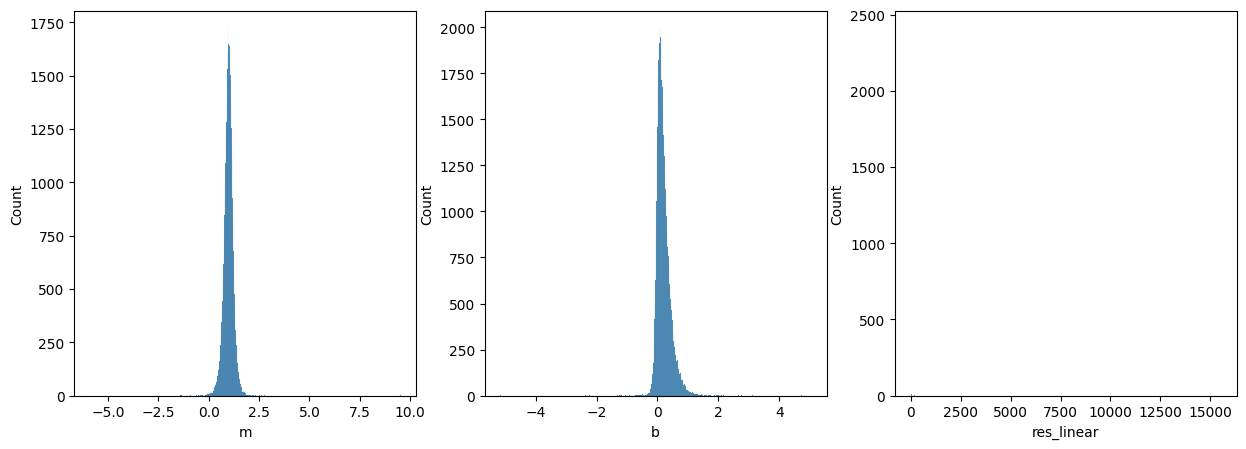

In [32]:
# # inspect distribution of linear fit params
# g, d, c = init_grid((1,len(linear_fit_df.columns)), (5,5))
# for i in linear_fit_df.columns:
#     plt.subplot(*g, next(c))
#     sns.histplot(linear_fit_df[i])

### hill fit with an amp param

In [33]:
# from scipy.optimize import curve_fit

# def func(x, a, b, c):
#     return c * (x**a/(b**a + x**a))

# def calc_square_error(x, y, a, b, c):
#     error = 0
#     for i in range(len(x)): 
#         xi = x[i]
#         yi = y[i]
#         error += (func(xi, a, b, c) - yi)**2
#     return error

In [34]:
# hill_fits = {}

# for peak, df in pdf.groupby("index"):
#     df["shifted value"] = df["normalized peak count"] - df.loc[df["dose"] == 0, "normalized peak count"].mean()
#     xdata = df["dose"].astype(float).values
#     ydata = df["shifted value"].values
    
#     # # Plot and plot guess
#     # plt.scatter(xdata, ydata)
#     # plt.plot(x, [func(i, 1, .3, 2) for i in x])
    
#     # Find guess 
#     amp_guess = 1
#     ka_guess = .025 if df.loc[df["dose"] == .05, "shifted value"].mean() > amp_guess/2 else .3
    
#     popt, pcov = curve_fit(func, xdata, ydata, p0=[ 1, ka_guess, amp_guess], bounds = ([.3, 0, 0], 
#                                                                                        [4, 5, 100]))
#     a, b, c = popt[0], popt[1], popt[2]
    
#     # # Plot results
#     # plt.scatter(xdata, ydata)
#     # x = np.linspace(0, 1)
#     # plt.plot(x, [func(i, a, b, c) for i in x])
    
#     hill_fits[peak] = {"h": a, "ka": b, "amp": c, "res_hill": calc_square_error(xdata, ydata, a, b, c)}

In [35]:
# hill_fits_df = pd.DataFrame(hill_fits).T
# hill_fits_df

In [36]:
# # inspect distribution of hill fit params
# g, d, c = init_grid((1,len(hill_fits_df.columns)), (5,5))
# for i in hill_fits_df.columns:
#     plt.subplot(*g, next(c))
#     sns.kdeplot(hill_fits_df[i])
# #sns.kdeplot(hill_fits_df["res_hill"])

### hill fit without an amp param

In [117]:
from scipy.optimize import curve_fit
import scipy

def func(x, a, b):
    return (x**a/(b**a + x**a))

def f_wrapper_for_odr(beta, x): # parameter order for odr
    return func(x, *beta)

def calc_square_error(x, y, a, b):
    error = 0
    for i in range(len(x)): 
        xi = x[i]
        yi = y[i]
        error += (func(xi, a, b) - yi)**2
    return error

In [102]:
hill_fits = {}

for peak, df in tqdm(pdf.groupby("index")):
    df["shifted value"] = df["normalized peak count"] - df.loc[df["dose"] == 0, "normalized peak count"].mean()
    xdata = df["dose"].astype(float).values
    ydata = df["shifted value"].values
    
    # # Plot and plot guess
    # plt.scatter(xdata, ydata)
    # plt.plot(x, [func(i, 1, .3, 2) for i in x])
    
    # Find guess 
    ka_guess = .025 if df.loc[df["dose"] == .05, "shifted value"].mean() > 0.5 else .3
    
    try:
        popt, pcov = curve_fit(func, xdata, ydata, p0=[ 1, ka_guess], bounds = ([0.01, 0], 
                                                                                       [10, 1]))
        a, b = popt[0], popt[1]
        # determine the significance of the fit
        model = odrpack.Model(f_wrapper_for_odr)
        data = odrpack.Data(xdata,ydata)
        myodr = odrpack.ODR(data, model, beta0=popt,  maxit=0)
        myodr.set_job(fit_type=2)

        parameterStatistics = myodr.run()
        df_e = len(xdata) - len(popt) # degrees of freedom, error
        #cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
        #sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
        ci = []
        t_df = scipy.stats.t.ppf(0.975, df_e)
        ci = []
        for i in range(len(popt)):
            ci.append([popt[i] - t_df * parameterStatistics.sd_beta[i], popt[i] + t_df * parameterStatistics.sd_beta[i]])

        tstat_beta = popt / [sd if sd>0 else 1e-3 for sd in parameterStatistics.sd_beta] # coeff t-statistics
        pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0   # coef. p-values

        hill_fits[peak] = {"h": a, "ka": b, "res_hill": calc_square_error(xdata, ydata, a, b), "h_pval": pstat_beta[0], "ka_pval": pstat_beta[1]}
    except:
        print(peak)
        continue

  3%|▎         | 7/235 [00:00<00:07, 32.32it/s]

HEK293T_P1A3_SP4_d075_peak_247220a
HEK293T_P1B3_SP4_d075_peak_137074c
HEK293T_P1B6_SP4_d005_peak_490647c


  9%|▉         | 22/235 [00:00<00:05, 37.19it/s]

HEK293T_P1E6_FOXP1_d005_peak_130625c
HEK293T_P1E8_FOXP3_d075_peak_172987c
HEK293T_P1F9_FOXP3_d050_peak_258209d


 60%|██████    | 141/235 [00:01<00:00, 113.79it/s]

HEK293T_P3A12_GFP_d100_peak_414681c
HEK293T_P3A12_GFP_d100_peak_542847b


 66%|██████▌   | 154/235 [00:01<00:00, 96.92it/s] 

HEK293T_P3B9_SOX2_d050_peak_41674a
HEK293T_P3D3_KLF4_d075_peak_1365197


 76%|███████▌  | 178/235 [00:02<00:00, 79.76it/s]

HEK293T_P3E2_KLF1_d100_peak_1268510b
HEK293T_P3F10_SPI1_d025_peak_188056a


 84%|████████▍ | 197/235 [00:02<00:00, 77.62it/s]

HEK293T_P3F10_SPI1_d025_peak_427407b


 88%|████████▊ | 206/235 [00:02<00:00, 65.72it/s]

HEK293T_P3F2_KLF1_d100_peak_358852a
HEK293T_P3F2_KLF1_d100_peak_651277
HEK293T_P3G3_KLF1_d075_peak_1335440a


 94%|█████████▍| 222/235 [00:02<00:00, 64.97it/s]

HEK293T_P3G3_KLF1_d075_peak_659713a
HEK293T_P3H2_KLF1_d100_peak_1343876d


100%|██████████| 235/235 [00:03<00:00, 74.52it/s]

HEK293T_P3H2_KLF1_d100_peak_251076


In [103]:
hill_fits_df = pd.DataFrame(hill_fits).T
hill_fits_df

h        ka      res_hill  \
HEK293T_P1A11_BACH2_d005_peak_116751  10.000000  1.000000  77167.519926   
HEK293T_P1A3_SP4_d075_peak_278987      9.999987  0.048008      0.950646   
HEK293T_P1A5_SP4_d025_peak_51859       0.703102  0.308919      2.893250   
HEK293T_P1A6_SP4_d005_peak_226841a     3.792165  0.494999      4.850808   
HEK293T_P1A6_SP4_d005_peak_424017a     0.704502  0.145363      3.139993   
...                                         ...       ...           ...   
HEK293T_P3H2_KLF1_d100_peak_374118a   10.000000  0.216637     38.633802   
HEK293T_P3H2_KLF1_d100_peak_547730     4.971821  0.000002      0.676938   
HEK293T_P3H2_KLF1_d100_peak_823412     1.609873  0.260914      1.921180   
HEK293T_P3H2_KLF1_d100_peak_97448b     9.999993  0.048076     34.702696   
HEK293T_P3H8_SPI1_d075_peak_311509a    4.049816  0.000058      9.493595   

                                        h_pval   ka_pval  
HEK293T_P1A11_BACH2_d005_peak_116751  0.998388  0.971729  
HEK293T_P1A3_SP4_d075_peak_278987     0.999998  0.999958  
HEK293T_P1A5_SP4_d025_peak_51859      0.470509  0.440451  
HEK293T_P1A6_SP4_d005_peak_226841a    0.588187  0.069084  
HEK293T_P1A6_SP4_d005_peak_424017a    0.455760  0.548923  
...                                        ...       ...  
HEK293T_P3H2_KLF1_d100_peak_374118a   0.999183  0.994298  
HEK293T_P3H2_KLF1_d100_peak_547730    0.000000  0.998124  
HEK293T_P3H2_KLF1_d100_peak_823412    0.339701  0.170192  
HEK293T_P3H2_KLF1_d100_peak_97448b    1.000000  0.999992  
HEK293T_P3H8_SPI1_d075_peak_311509a   0.000000  0.954214  

[216 rows x 5 columns]

In [104]:
# # inspect distribution of hill fit params
# g, d, c = init_grid((len(hill_fits_df.columns)//5+1,5), (5,5))
# for i in hill_fits_df.columns:
#     plt.subplot(*g, next(c))
#     sns.kdeplot(hill_fits_df[i])
# #sns.kdeplot(hill_fits_df["res_hill"])

### identify peaks better fit with a linear model

In [105]:
t = pd.concat([linear_fit_df, hill_fits_df], axis = 1)
t = t.dropna(axis=0)
t.head()

m          b    res_linear  \
HEK293T_P1A11_BACH2_d005_peak_116751 -34.718590 -12.668339  65258.838132   
HEK293T_P1A3_SP4_d075_peak_278987      1.185027   0.271718      3.252978   
HEK293T_P1A5_SP4_d025_peak_51859       0.808739   0.066254      2.918132   
HEK293T_P1A6_SP4_d005_peak_226841a     0.991346  -0.015407      4.929816   
HEK293T_P1A6_SP4_d005_peak_424017a     0.926943   0.097852      3.313620   

                                              h        ka      res_hill  \
HEK293T_P1A11_BACH2_d005_peak_116751  10.000000  1.000000  77167.519926   
HEK293T_P1A3_SP4_d075_peak_278987      9.999987  0.048008      0.950646   
HEK293T_P1A5_SP4_d025_peak_51859       0.703102  0.308919      2.893250   
HEK293T_P1A6_SP4_d005_peak_226841a     3.792165  0.494999      4.850808   
HEK293T_P1A6_SP4_d005_peak_424017a     0.704502  0.145363      3.139993   

                                        h_pval   ka_pval  
HEK293T_P1A11_BACH2_d005_peak_116751  0.998388  0.971729  
HEK293T_P1A3_SP4_d075_peak_278987     0.999998  0.999958  
HEK293T_P1A5_SP4_d025_peak_51859      0.470509  0.440451  
HEK293T_P1A6_SP4_d005_peak_226841a    0.588187  0.069084  
HEK293T_P1A6_SP4_d005_peak_424017a    0.455760  0.548923

In [106]:
# sns.histplot(t["res_linear"] - t["res_hill"])

In [107]:
np.quantile(t["res_linear"] - t["res_hill"], q=0.01)

-697.6984947768053

In [ ]:
#t.to_csv(f"{outdir}/sensitivity_{TF}_fit.csv")
t.to_csv(f"{outdir}/sensitivity_{TF}_log2fc0.58_fit.csv")

In [ ]:
# t = pd.read_csv(f"{outdir}/sensitivity_{TF}_log2fc0.58_fit.csv", index_col=0)
# t

m         b  res_linear  \
HEK293T_P1A10_BACH2_d025_peak_105924  0.582367  0.191586    8.731035   
HEK293T_P1A10_BACH2_d025_peak_119073  0.752504  0.109888    3.138983   
HEK293T_P1A10_BACH2_d025_peak_142191  1.263934 -0.031939    5.341712   
HEK293T_P1A10_BACH2_d025_peak_156777  1.197947 -0.007412    3.534912   
HEK293T_P1A10_BACH2_d025_peak_241946  1.061515  0.074887    4.506384   
...                                        ...       ...         ...   
HEK293T_P3H9_SPI1_d050_peak_345325    0.708487  0.012234   11.093751   
HEK293T_P3H9_SPI1_d050_peak_42259     0.894699 -0.019387    2.968800   
HEK293T_P3H9_SPI1_d050_peak_42573     1.064037  0.574006   16.259268   
HEK293T_P3H9_SPI1_d050_peak_5443b     0.858748  0.389466   10.946478   
HEK293T_P3H9_SPI1_d050_peak_95729e    1.122373  0.289353    6.138820   

                                              h        ka   res_hill  \
HEK293T_P1A10_BACH2_d025_peak_105924   0.281494  0.132309   8.079593   
HEK293T_P1A10_BACH2_d025_peak_119073   0.529768  0.276308   3.278735   
HEK293T_P1A10_BACH2_d025_peak_142191  10.000000  0.433874   4.515726   
HEK293T_P1A10_BACH2_d025_peak_156777   3.126535  0.324226   3.278635   
HEK293T_P1A10_BACH2_d025_peak_241946   1.689804  0.254279   4.480736   
...                                         ...       ...        ...   
HEK293T_P3H9_SPI1_d050_peak_345325    10.000000  0.808294  10.801457   
HEK293T_P3H9_SPI1_d050_peak_42259      6.941023  0.675394   2.904105   
HEK293T_P3H9_SPI1_d050_peak_42573      9.082473  0.042371  12.463977   
HEK293T_P3H9_SPI1_d050_peak_5443b      9.999730  0.053288   6.514954   
HEK293T_P3H9_SPI1_d050_peak_95729e     9.995602  0.059746   2.539716   

                                        h_pval       ka_pval  
HEK293T_P1A10_BACH2_d025_peak_105924  0.632265  7.331006e-01  
HEK293T_P1A10_BACH2_d025_peak_119073  0.217051  2.275624e-01  
HEK293T_P1A10_BACH2_d025_peak_142191  0.897710  3.729573e-01  
HEK293T_P1A10_BACH2_d025_peak_156777  0.125577  4.411216e-04  
HEK293T_P1A10_BACH2_d025_peak_241946  0.192218  5.435603e-02  
...                                        ...           ...  
HEK293T_P3H9_SPI1_d050_peak_345325    0.518856  3.010878e-06  
HEK293T_P3H9_SPI1_d050_peak_42259     0.163660  1.393452e-08  
HEK293T_P3H9_SPI1_d050_peak_42573     0.999998  9.999903e-01  
HEK293T_P3H9_SPI1_d050_peak_5443b     0.999995  9.999251e-01  
HEK293T_P3H9_SPI1_d050_peak_95729e    0.999976  9.998663e-01  

[57972 rows x 8 columns]

### examples of peaks with a better linear fit

In [12]:
def plot_peaks(peakset,pdf,t,fit,func=None, showparam=False, titletexts=None, cpm=False):
    # func is only needed if fit=="hill"
    g, d, c = init_grid((len(peakset)//5+1,5), (7,7))
    for peak in peakset:
        plt.subplot(*g, next(c))
        df = pdf[pdf["index"] == peak]
        x = np.linspace(0, 1)
        offset = df.loc[df.dose==0, "normalized peak count"].mean()
        scale = df.loc[df.dose==1, "normalized peak count"].mean() - offset

        titletext = peak
        if titletexts is not None:
            titletext = titletexts[peak]
        matplotlib.rc("font",size=20)
        sns.scatterplot(data = df, x = "dose", y = "normalized peak count", s=150).set(title=titletext)

        # then choose one of the three below to plot a line
        if fit == "nofit":
            sns.lineplot(data = df, x = "dose", y = "normalized peak count", linewidth=5)
        elif fit == "linear":
            plt.plot(x, [np.polyval([t.loc[peak,"m"], t.loc[peak,"b"]], i) * scale + offset for i in x], linewidth=5)
            if showparam:
                plt.title(titletext + "\n" + f"m={round(t.loc[peak, 'm'],3)}, b={round(t.loc[peak, 'b'],3)}")
        elif fit == "hill":
            plt.plot(x, [func(i, t.loc[peak, "h"], t.loc[peak, "ka"]) * scale + offset for i in x], linewidth=5)
            if showparam:
                plt.title(titletext + "\n" + f"h={round(t.loc[peak, 'h'],3)} (p={round(t.loc[peak,'h_pval'],3)}), " +  
                          f"ka={round(t.loc[peak, 'ka'],3)} (p={round(t.loc[peak,'ka_pval'],3)})")
        elif fit == "hillamp":
             plt.plot(x, [func(i, t.loc[peak, "h"], t.loc[peak, "ka"], t.loc[peak, "amp"]) + offset for i in x])
             if showparam:
                plt.title(titletext + "\n" + f"h={round(t.loc[peak, 'h'],3)} (p={round(t.loc[peak,'h_pval'],3)}), " +  
                          f"ka={round(t.loc[peak, 'ka'],3)} (p={round(t.loc[peak,'ka_pval'],3)})" + "\n" + "amp={round(t.loc[peak, 'ka'], 3)}" )
        
        # ylab
        if cpm:
            label="ATAC CPM"
        else:
            label="Scaled ATAC CPM (0-1)"

        plt.tight_layout()
        plt.ylabel(label)
        plt.xlabel("TF Plasmid Dose ng/uL")

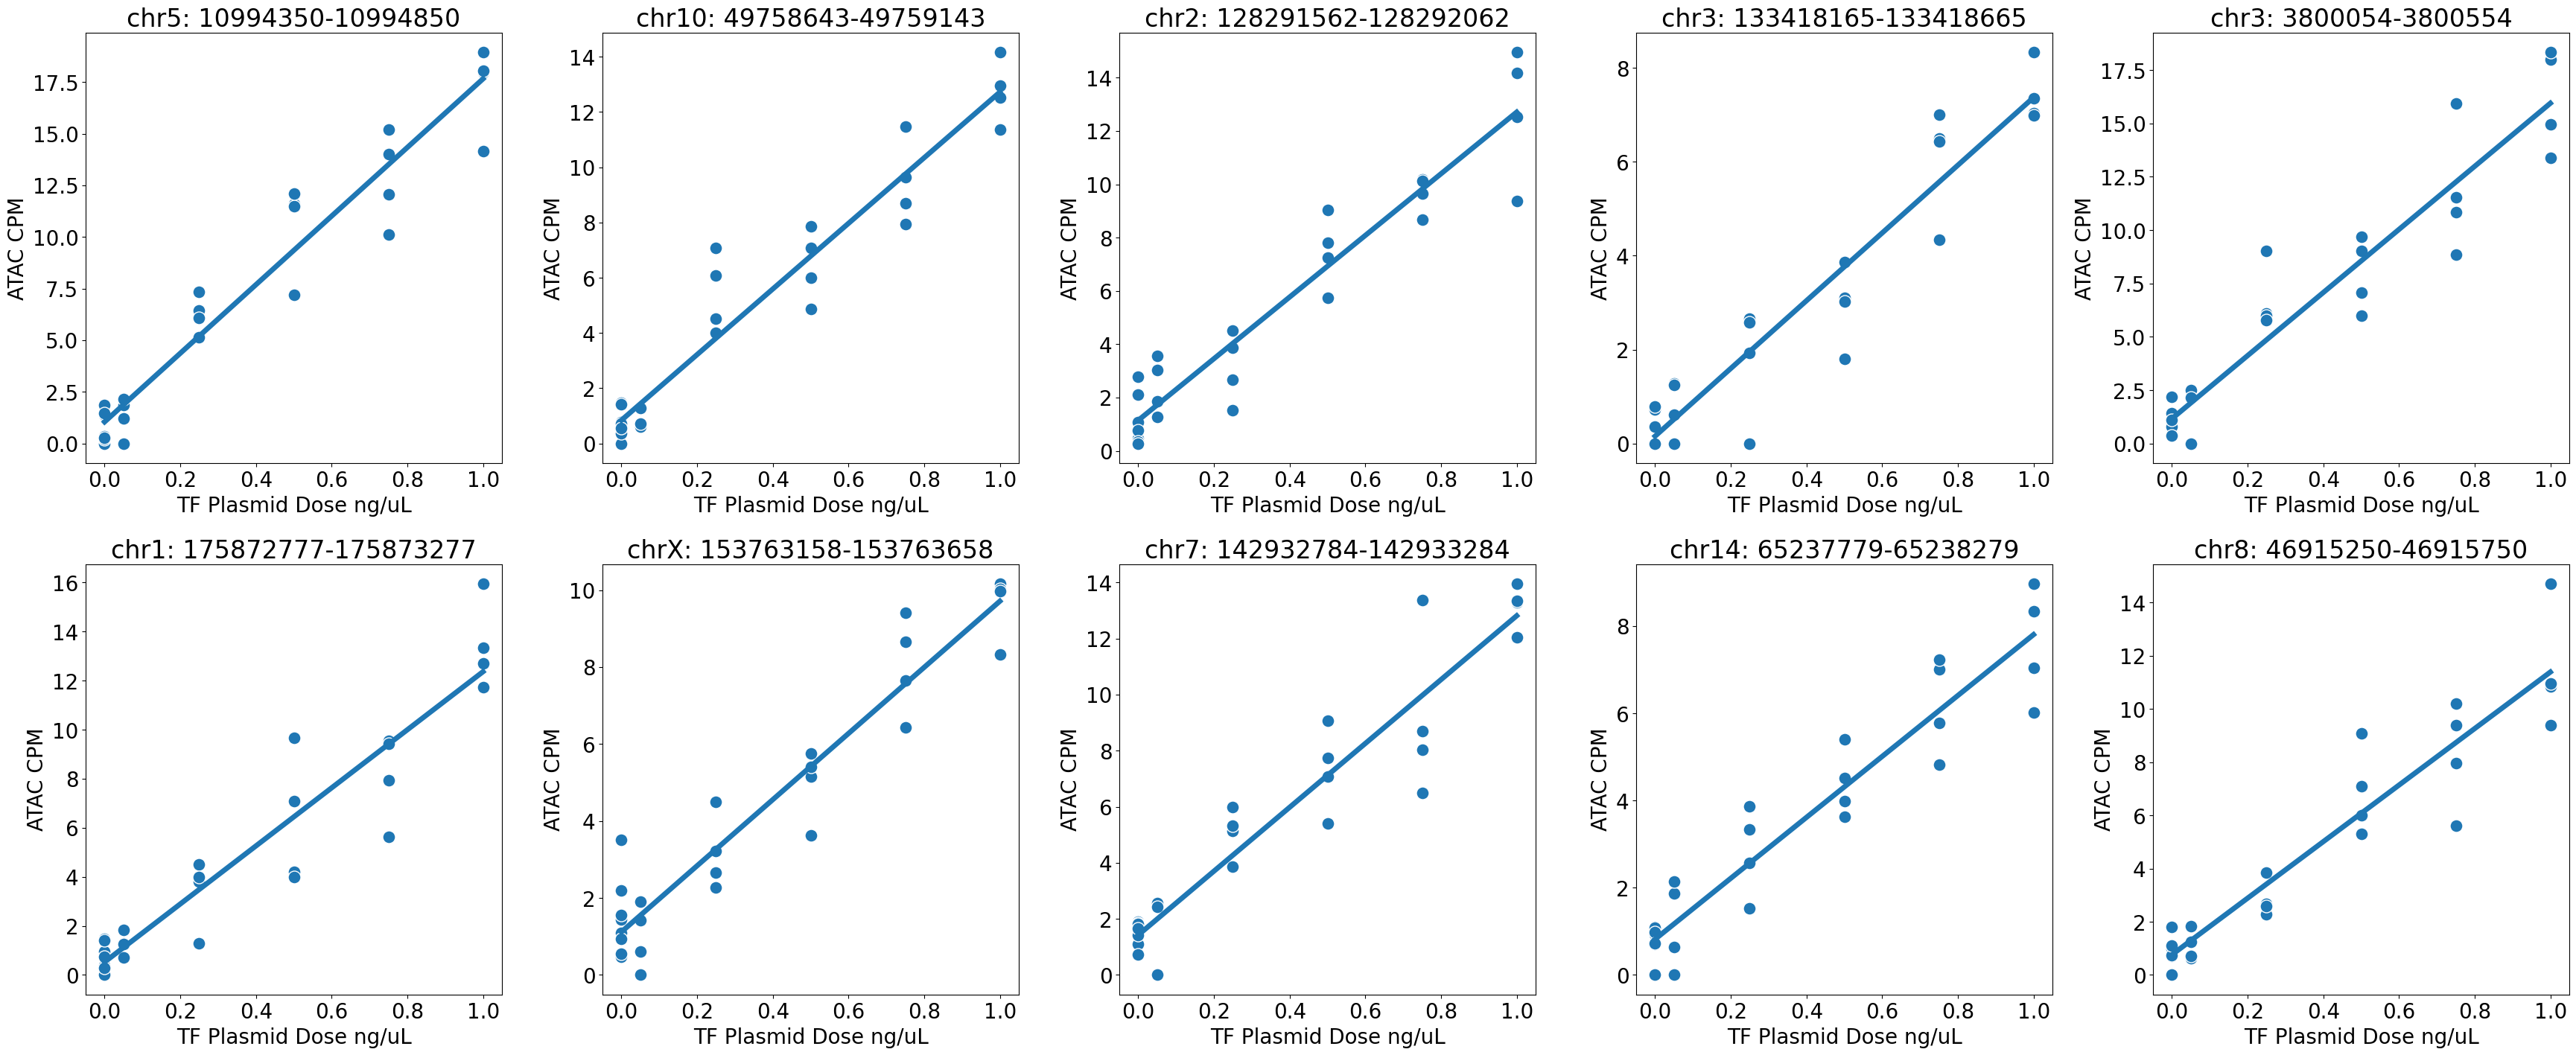

In [ ]:
plot_peaks(t[t["res_linear"] - t["res_hill"] < 0].sort_values(by="res_linear").index[:10],pdf_raw,t,"linear", titletexts=de.peakloc, cpm=True)
plt.savefig(f"{plotdir}/example_peaks_linear_{TF}.pdf")

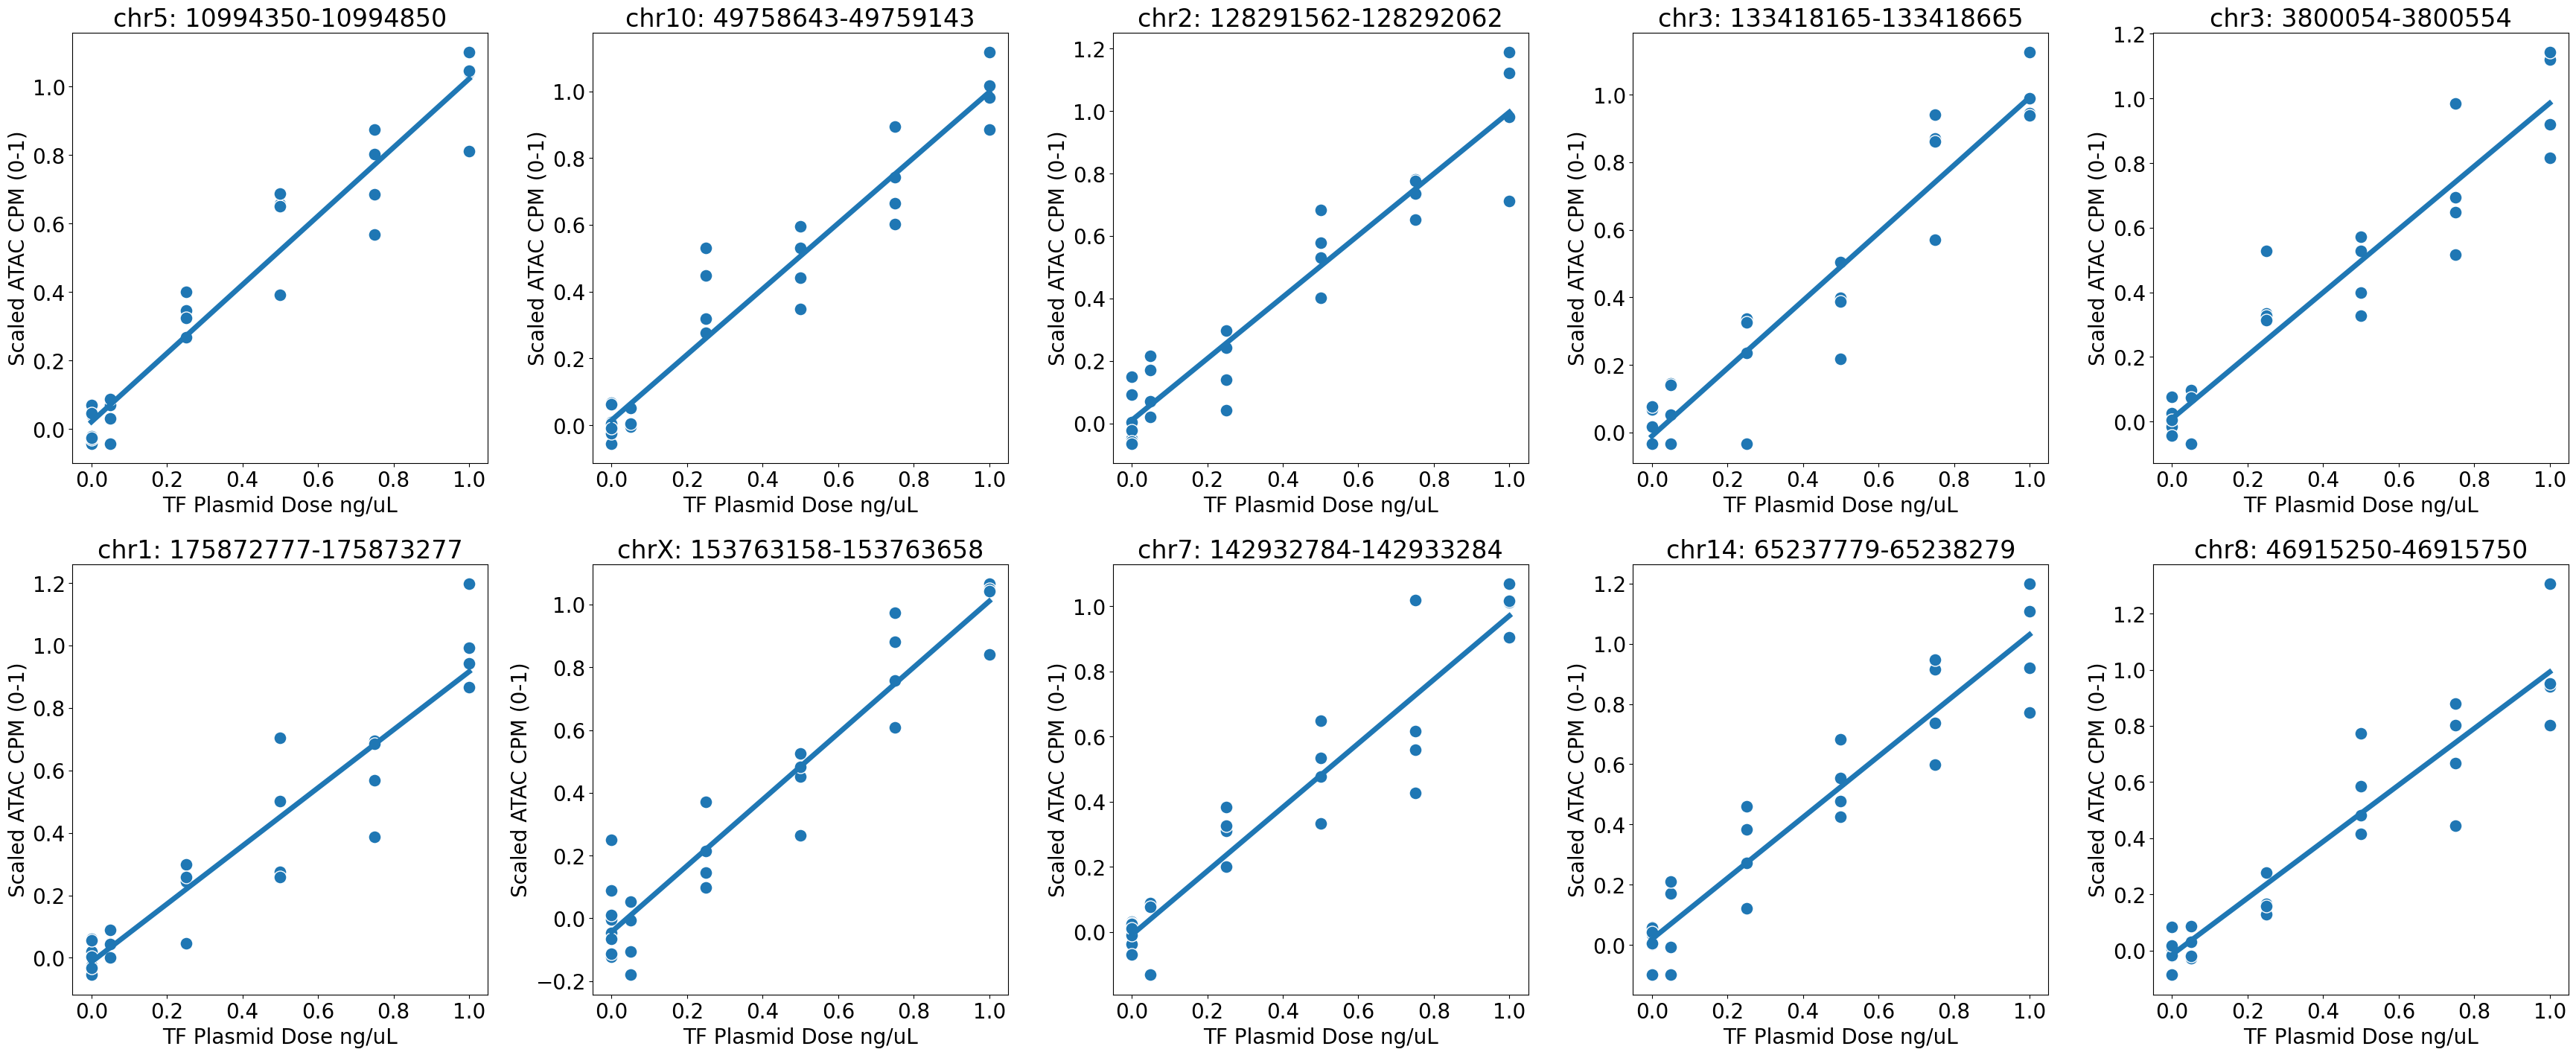

In [ ]:
plot_peaks(t[t["res_linear"] - t["res_hill"] < 0].sort_values(by="res_linear").index[:10],pdf,t,"linear", titletexts=de.peakloc)
plt.savefig(f"{plotdir}/example_peaks_linear_{TF}_0to1.pdf")

### example of peaks with a better hill fit

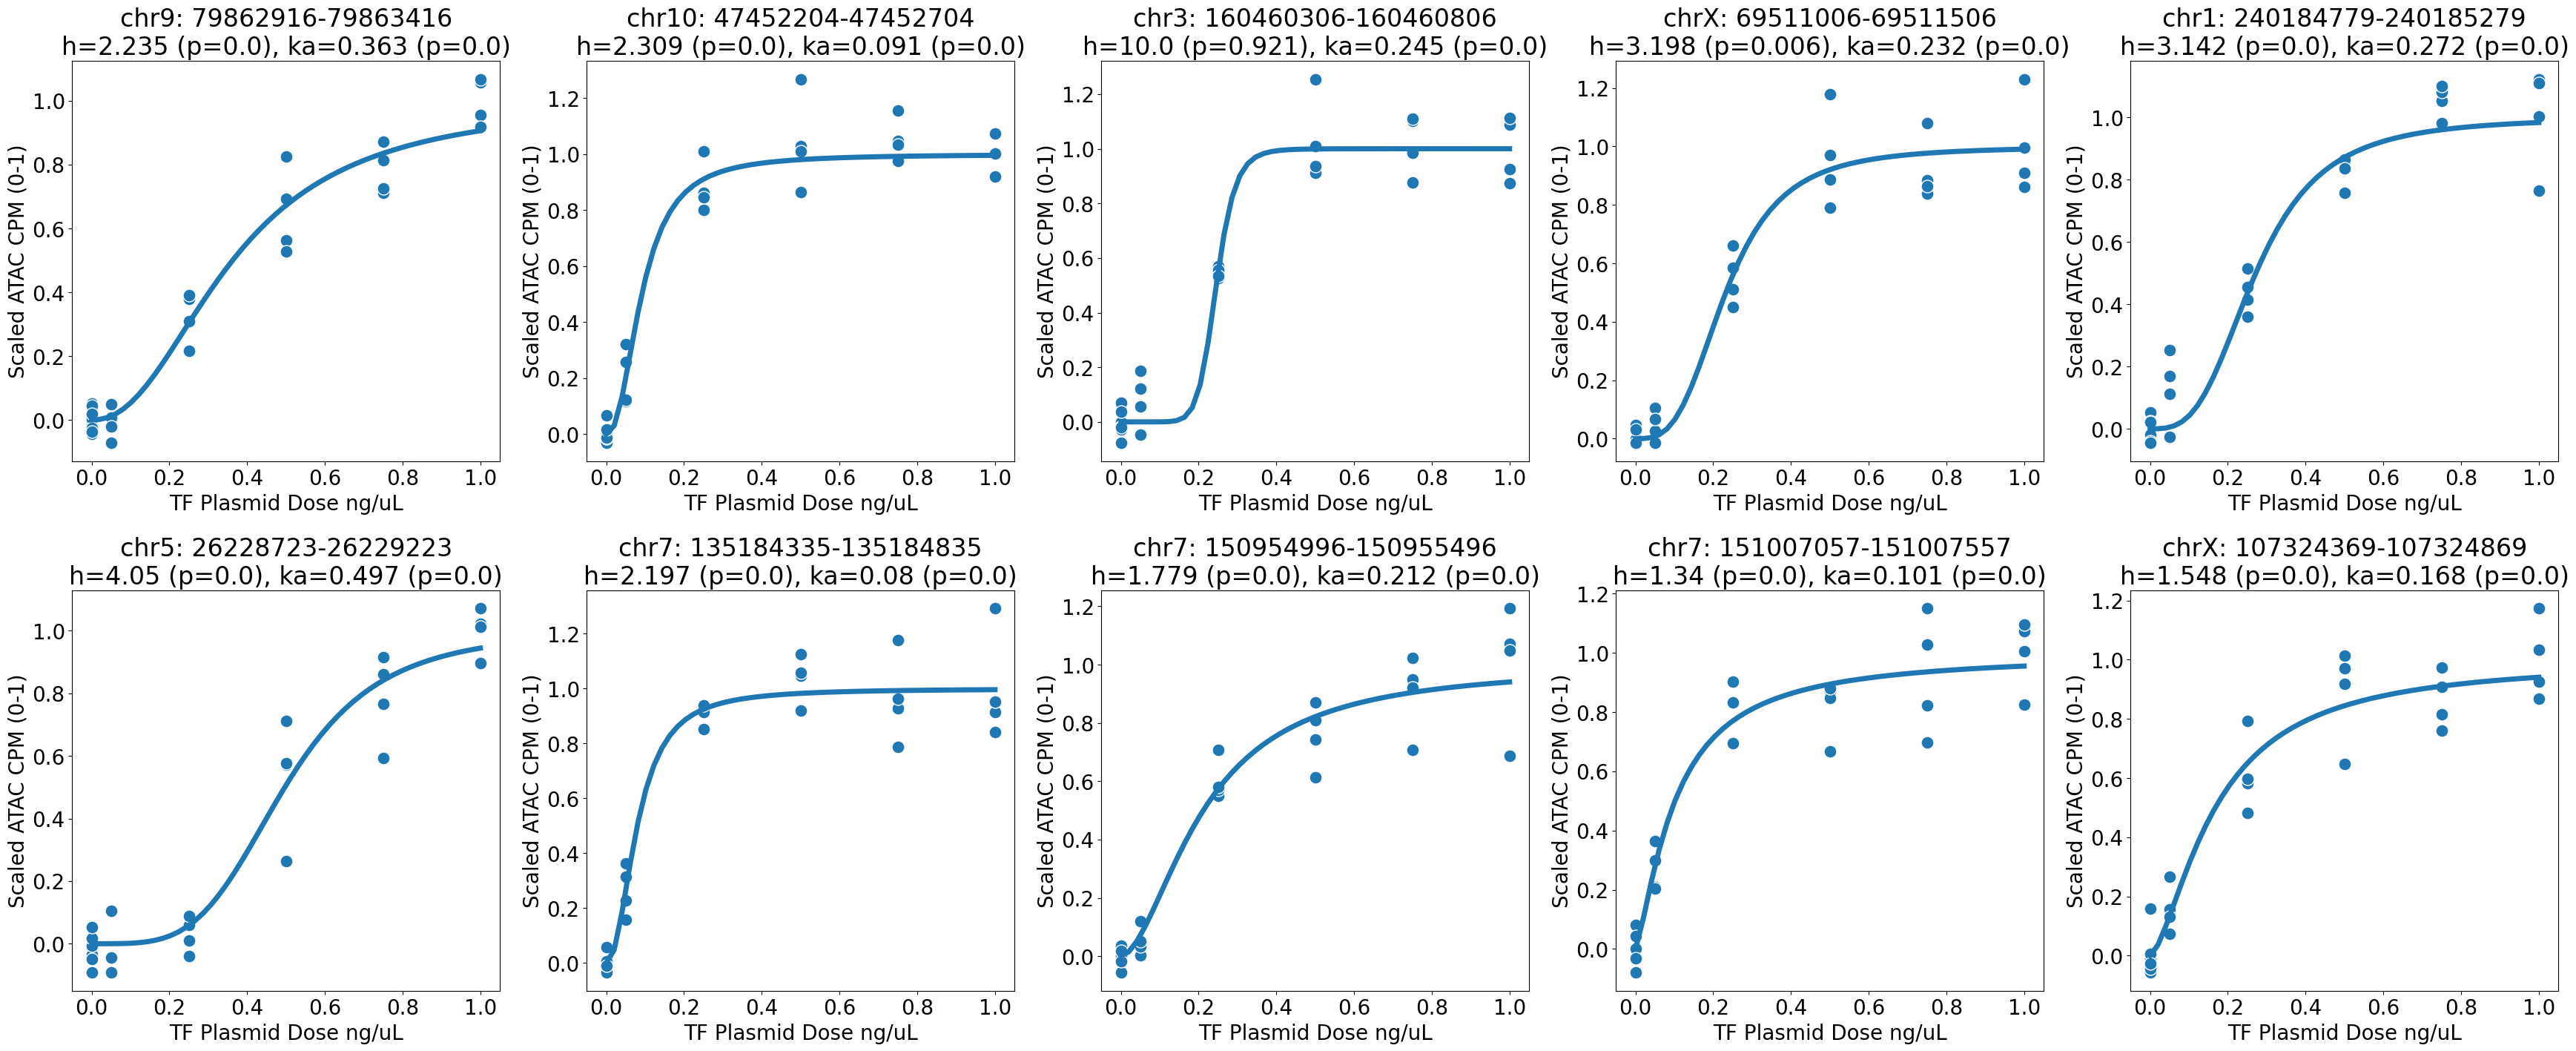

In [ ]:
plot_peaks(t[t["res_linear"] - t["res_hill"] > 0].sort_values(by="res_hill").index[:10],pdf,t,"hill", func=func, titletexts=de.peakloc, showparam=True)
plt.savefig(f"{plotdir}/example_peaks_hill_{TF}_0to1.pdf")

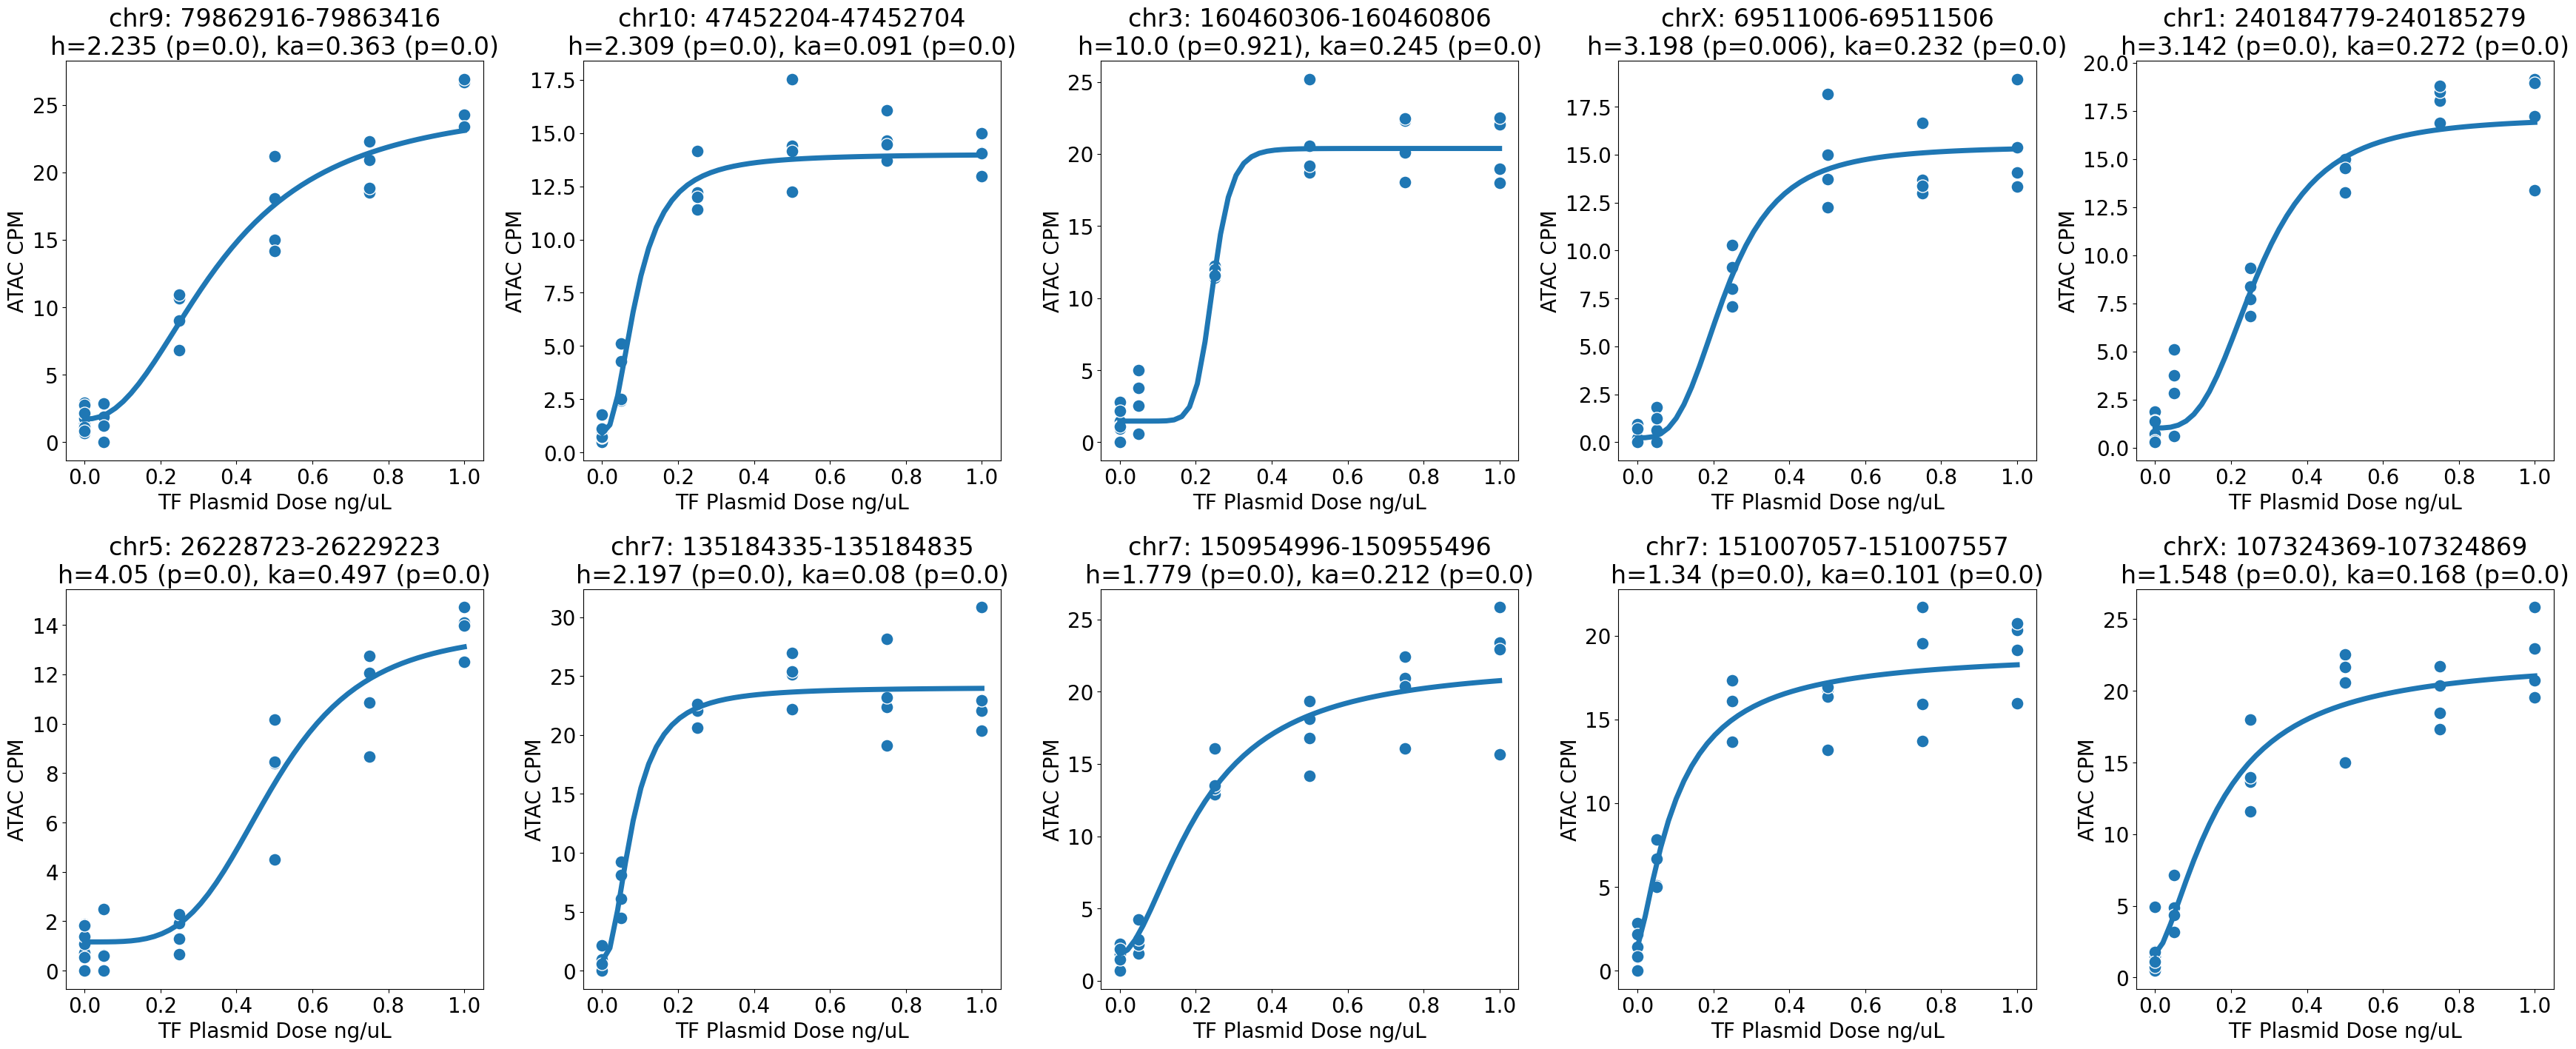

In [ ]:
plot_peaks(t[t["res_linear"] - t["res_hill"] > 0].sort_values(by="res_hill").index[:10],pdf_raw,t,"hill", func=func, titletexts=de.peakloc, showparam=True, cpm=True)
plt.savefig(f"{plotdir}/example_peaks_hill_{TF}.pdf")

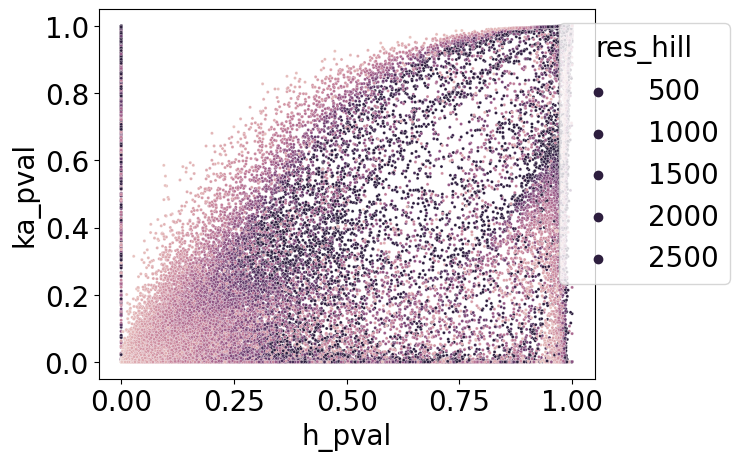

In [54]:
sns.scatterplot(t, x="h_pval", y="ka_pval",hue="res_hill", hue_norm=(0,10),s=5)
plt.legend(title="res_hill",loc='upper right', bbox_to_anchor=(1.3, 1))

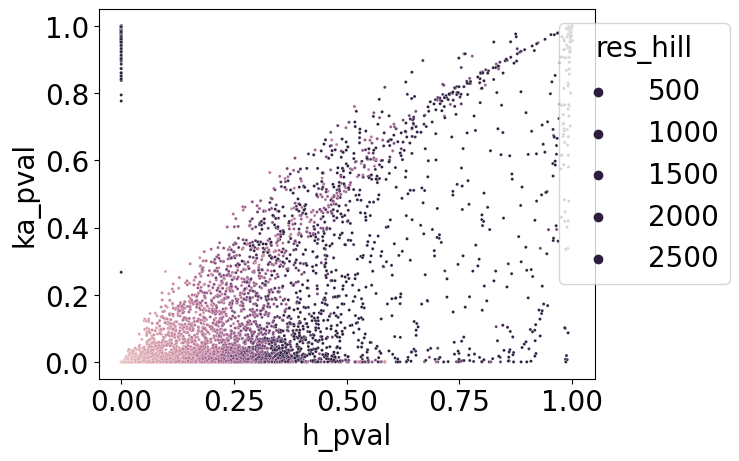

In [55]:
# only look at the peaks better fit by linear
sns.scatterplot(t[t["res_linear"] - t["res_hill"] < 0], x="h_pval", y="ka_pval",hue="res_hill", hue_norm=(0,10),s=5)
plt.legend(title="res_hill",loc='upper right', bbox_to_anchor=(1.3, 1))

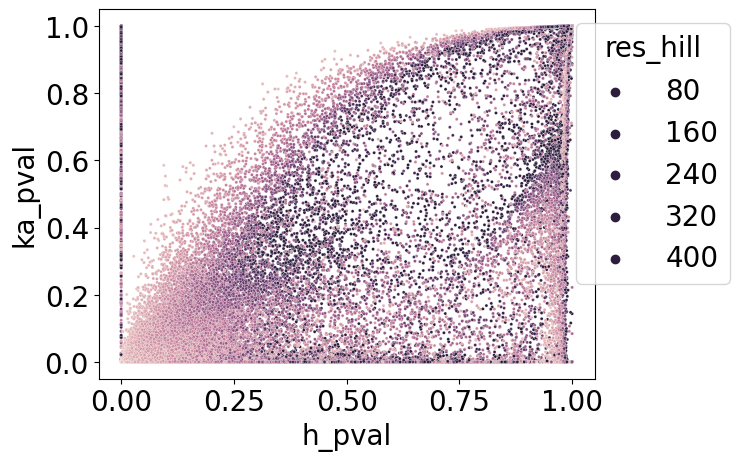

In [56]:
# only look at the peaks better fit by hill
sns.scatterplot(t[t["res_linear"] - t["res_hill"] > 0], x="h_pval", y="ka_pval",hue="res_hill", hue_norm=(0,10),s=5)
plt.legend(title="res_hill",loc='upper right', bbox_to_anchor=(1.3, 1))

In [57]:
h_pval_cutoff = 0.2
ka_pval_cutoff = 0.2

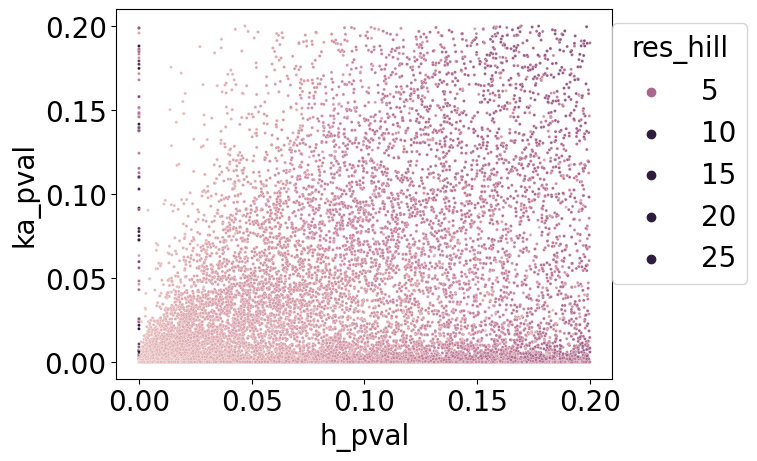

In [58]:
# p values after filtering 
sns.scatterplot(t[(t.h_pval < h_pval_cutoff) & (t.ka_pval < ka_pval_cutoff)], x="h_pval", y="ka_pval",hue="res_hill", hue_norm=(0,10),s=5)
plt.legend(title="res_hill",loc='upper right', bbox_to_anchor=(1.3, 1))

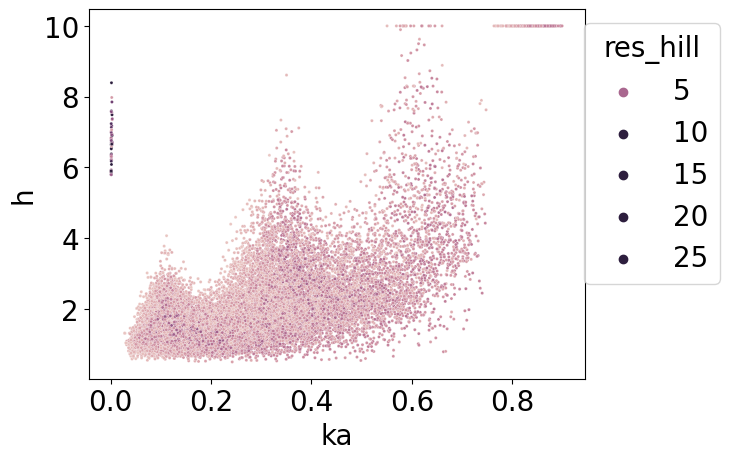

In [59]:
sns.scatterplot(t[(t.h_pval < h_pval_cutoff) & (t.ka_pval < ka_pval_cutoff)], x="ka", y="h",hue="res_hill", hue_norm=(0,10),s=5)
plt.legend(title="res_hill",loc='upper right', bbox_to_anchor=(1.3, 1))

In [60]:
t[(t.h_pval < h_pval_cutoff) & (t.ka_pval<ka_pval_cutoff)].shape

(17720, 8)

In [61]:
t.shape

(57972, 8)

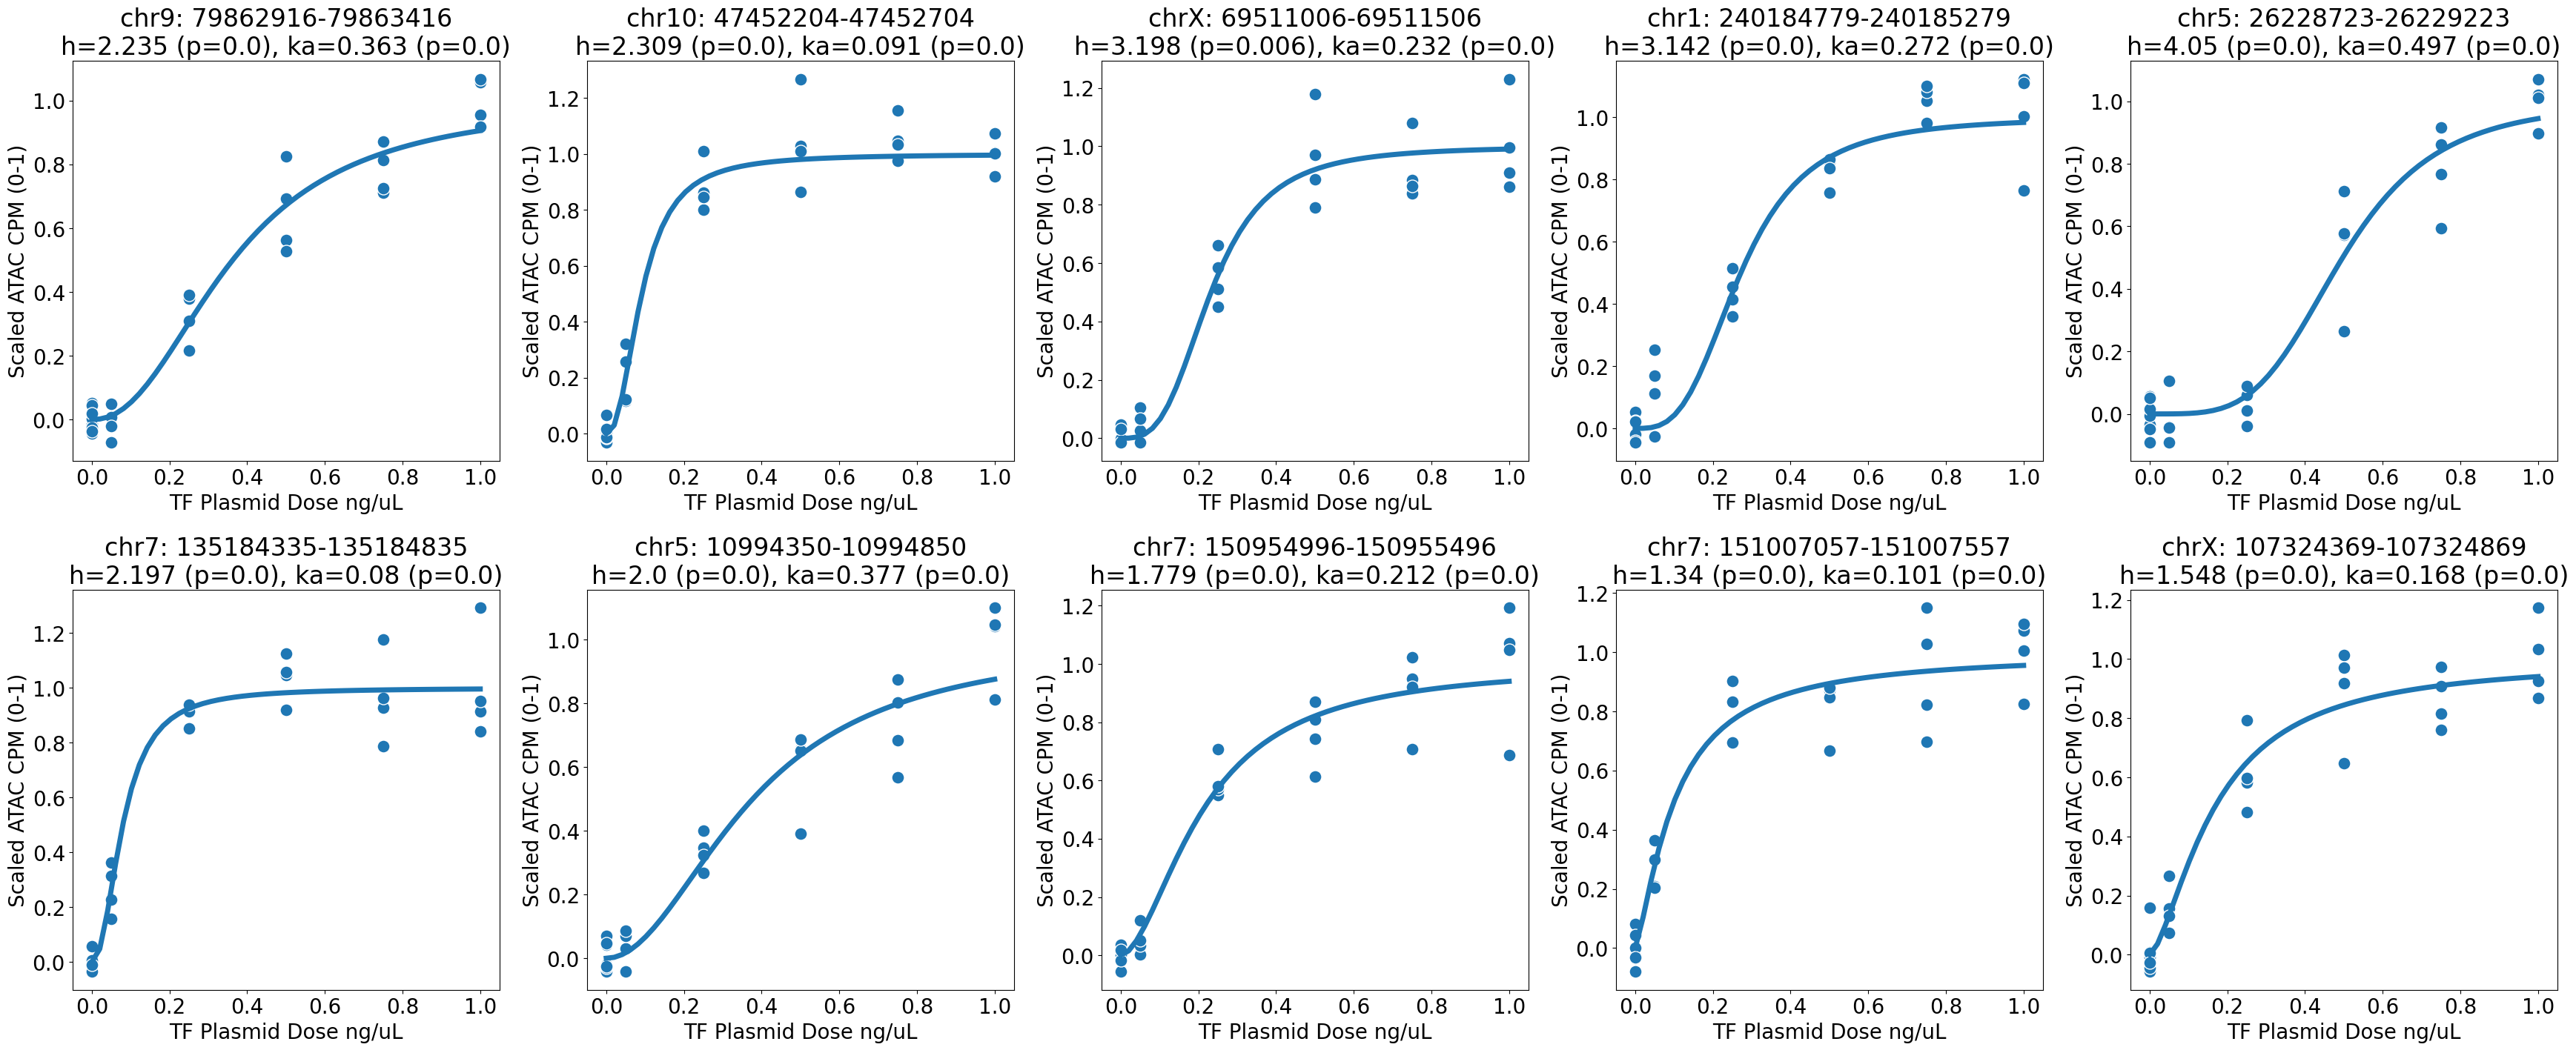

In [62]:
# evaluate goodness of fit
peakset = t[(t.h_pval<h_pval_cutoff) & (t.ka_pval<ka_pval_cutoff)].sort_values(by="res_hill").index[:10]
plot_peaks(peakset,pdf,t, "hill",func=func, showparam=True, titletexts=de.peakloc)

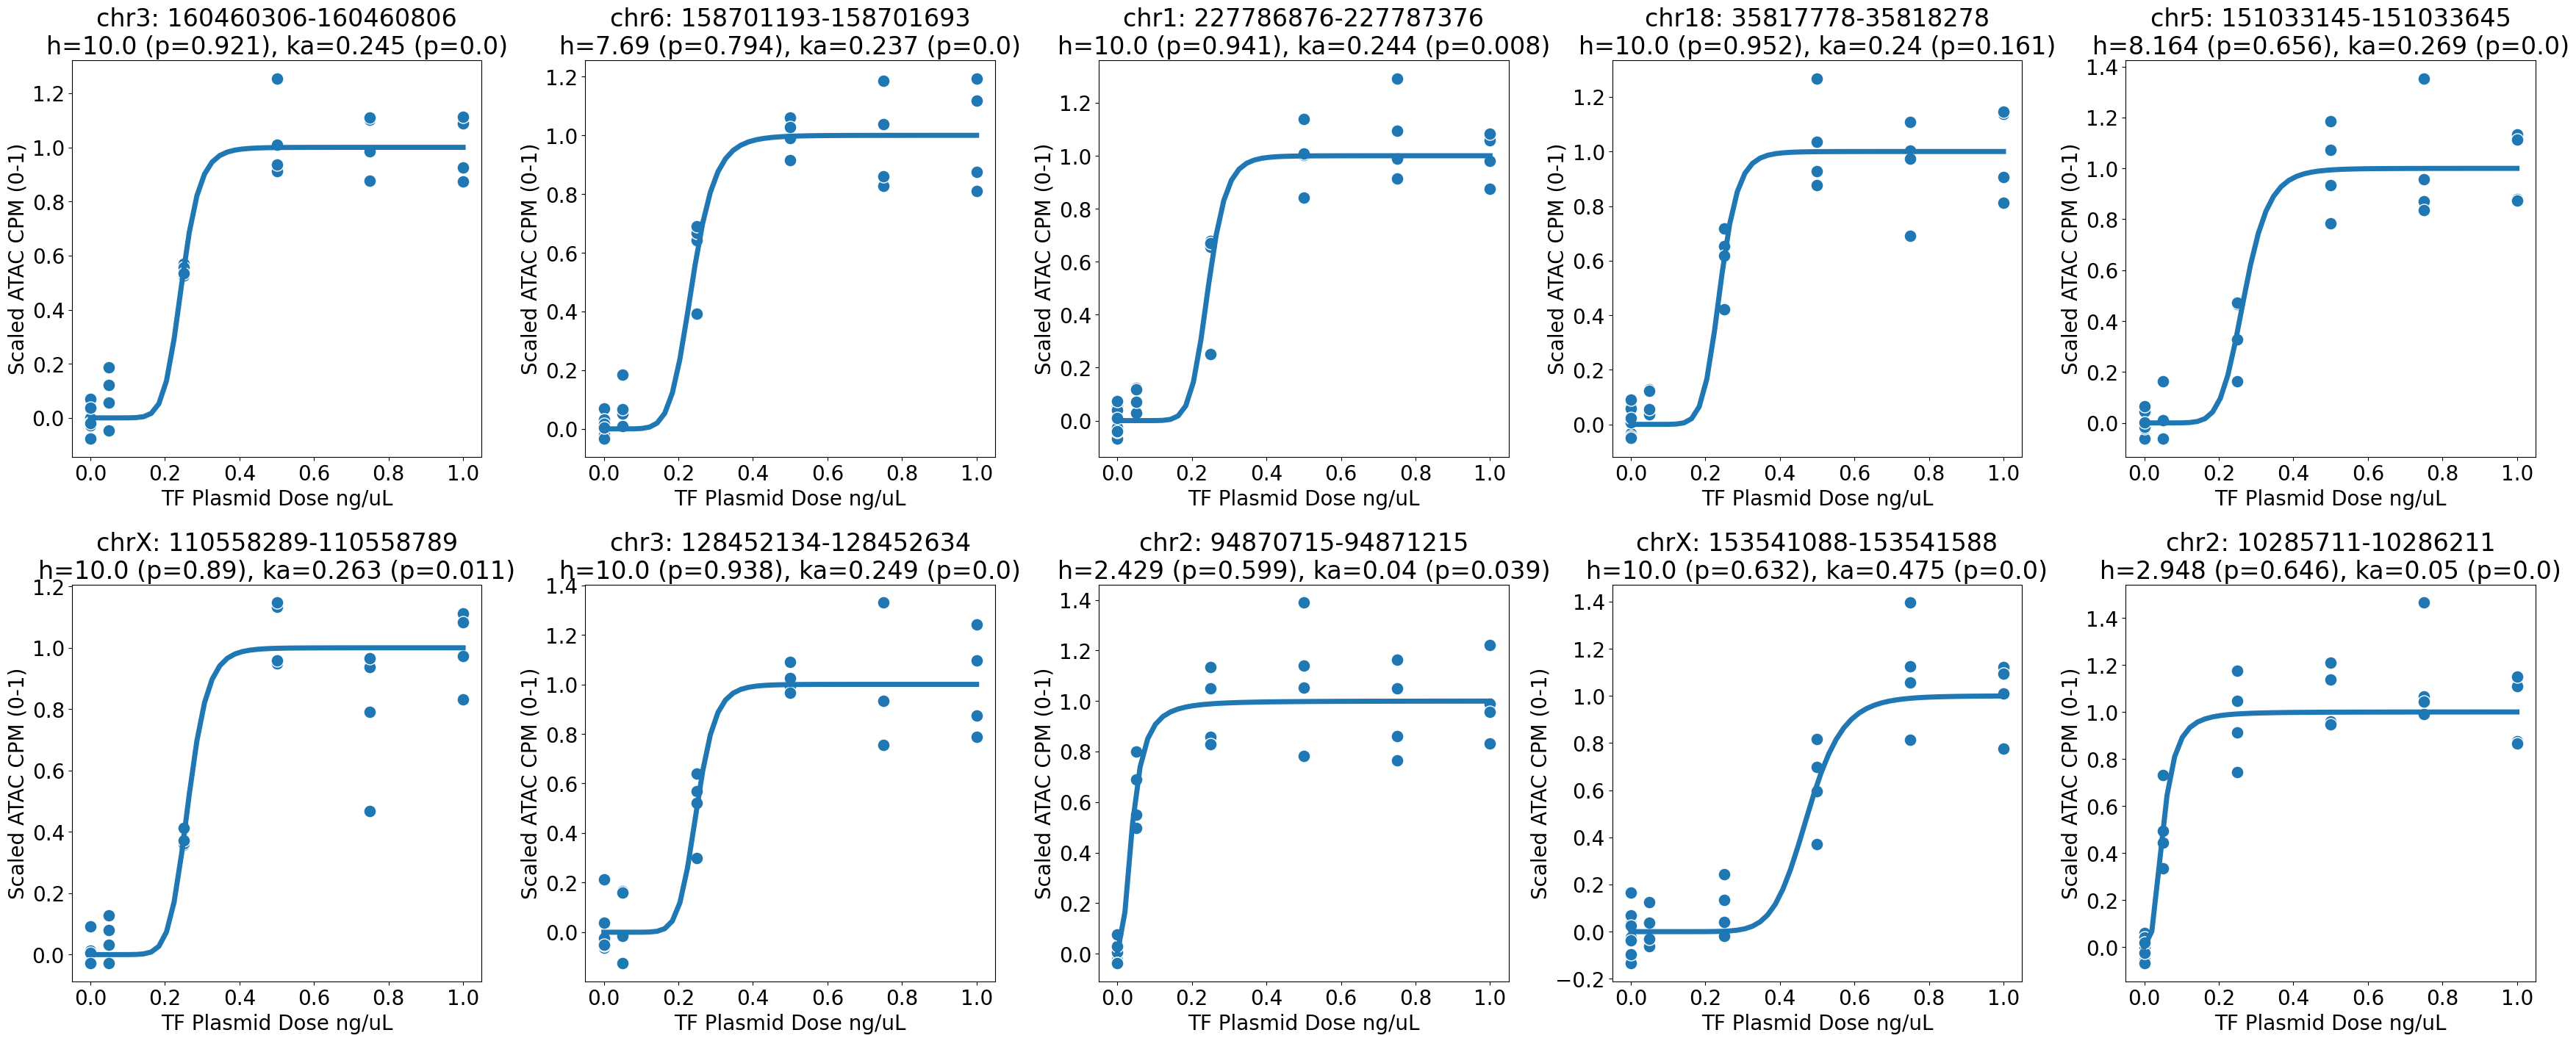

In [63]:
# evaluate goodness of fit
peakset = t[(t.ka_pval<ka_pval_cutoff) & (t.h_pval>0.4)].sort_values(by="res_hill").index[:10]
plot_peaks(peakset,pdf,t, "hill",func=func, showparam=True, titletexts=de.peakloc)

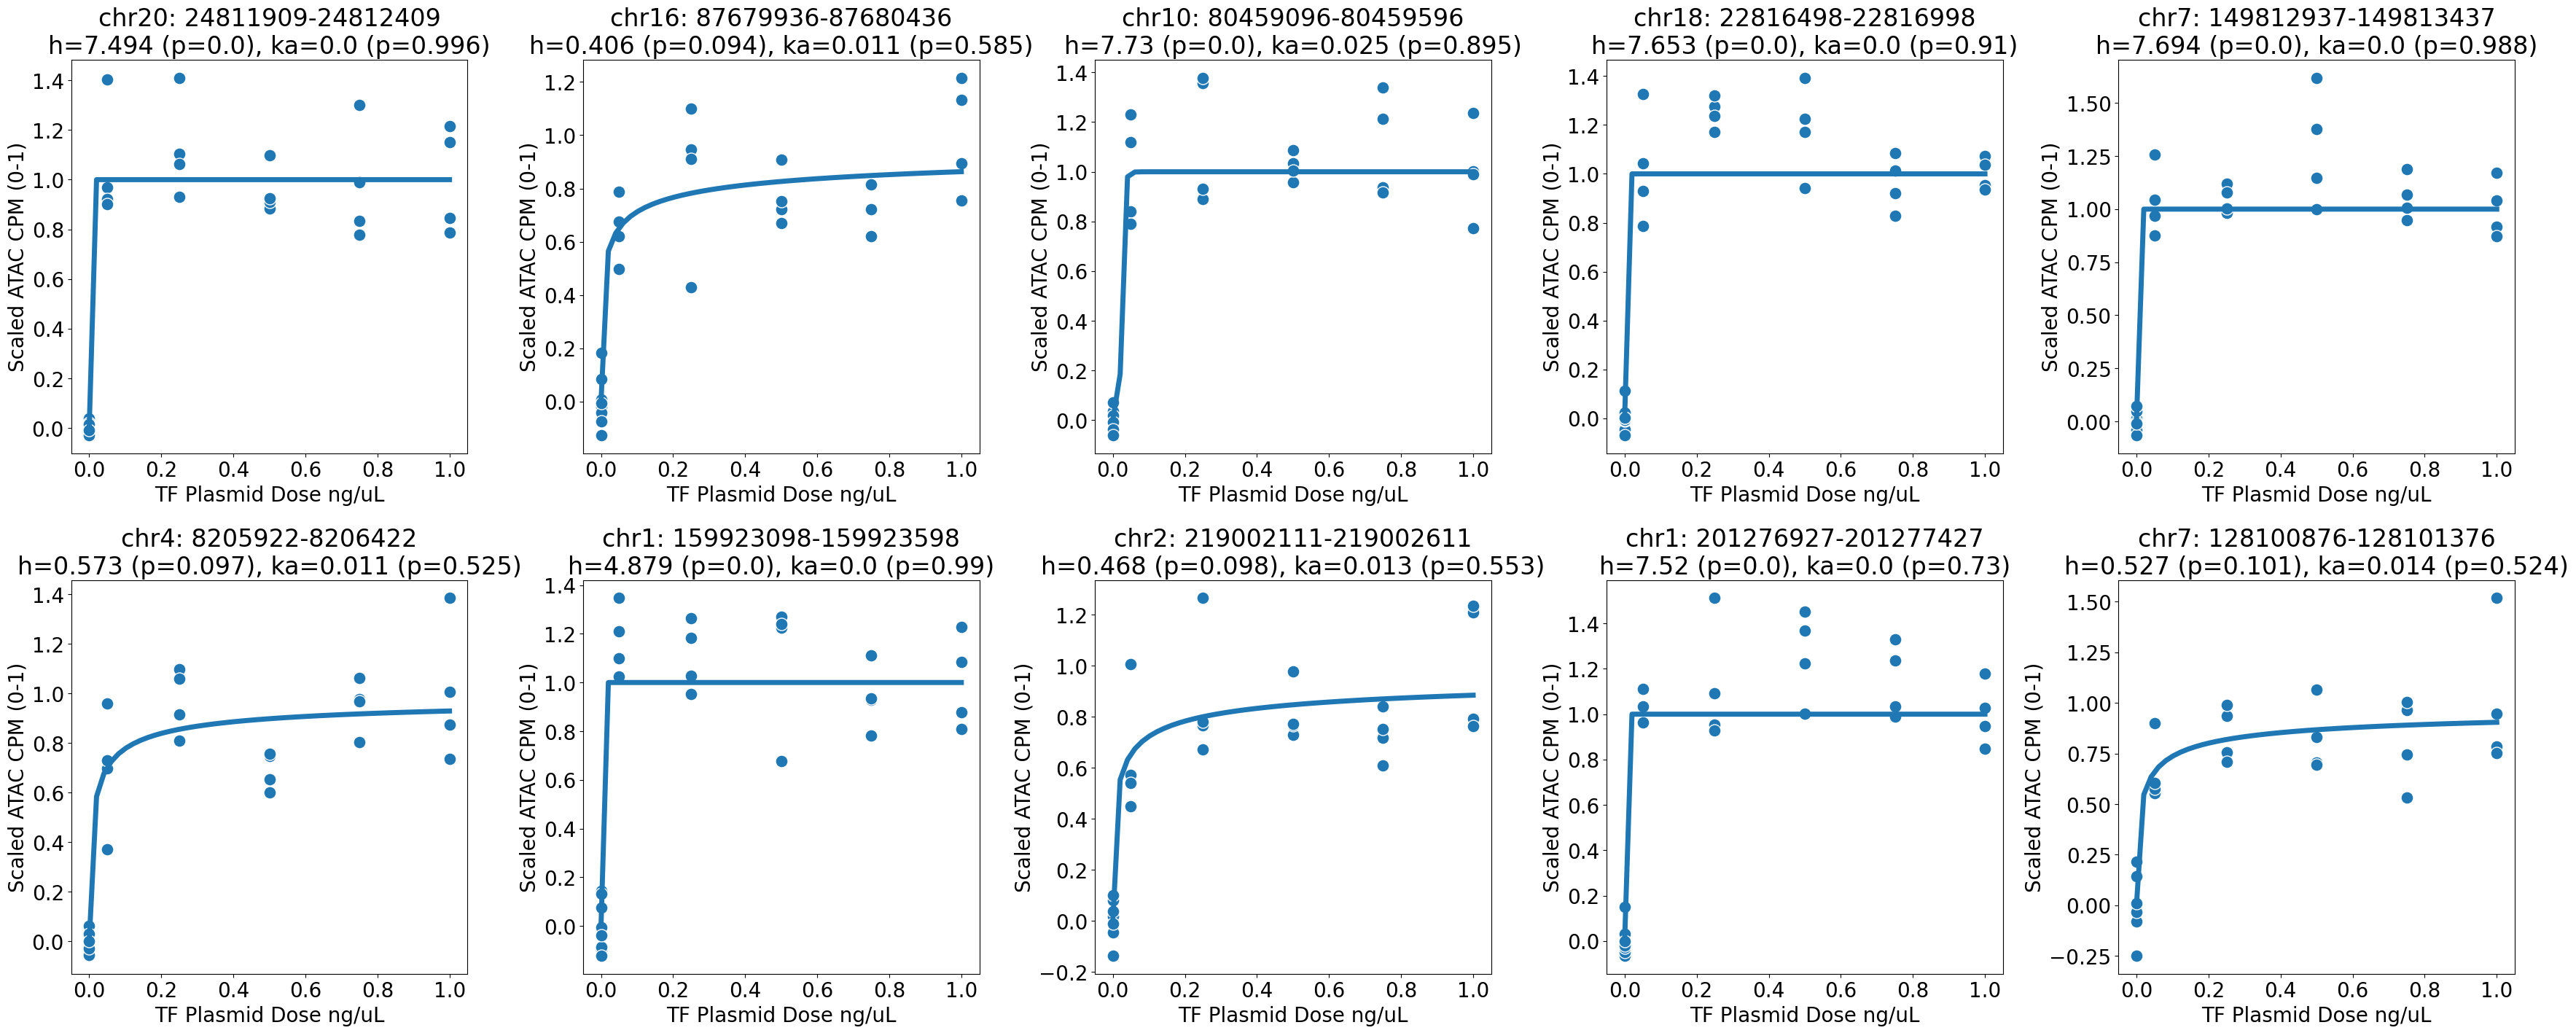

In [64]:
# evaluate goodness of fit
peakset = t[(t.h_pval<h_pval_cutoff) & (t.ka_pval>0.4)].sort_values(by="res_hill").index[:10]
plot_peaks(peakset,pdf,t, "hill",func=func, showparam=True, titletexts=de.peakloc)

### ec50 analysis

In [ ]:
#t = pd.read_csv(f"{outdir}/sensitivity_{TF}_fit.csv", index_col=0)
t = pd.read_csv(f"{outdir}/sensitivity_{TF}_log2fc0.58_fit.csv", index_col=0)

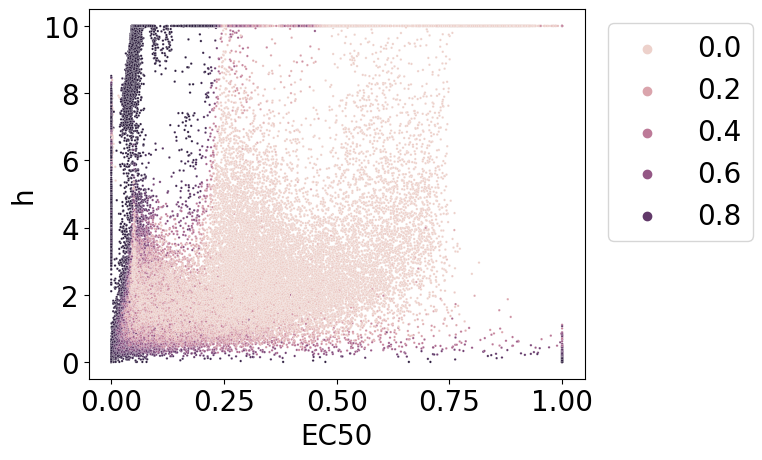

In [66]:
# plot ka vs h but ignore the ones that didn't fit 
t["delta residuals (linear - hill)"] = t.res_linear - t.res_hill
sns.scatterplot(x=t.ka,y=t.h, hue=t["ka_pval"], s=3)
#plt.yscale("log")
plt.xlabel("EC50")
plt.legend(loc="upper left", bbox_to_anchor=(1.02,1))

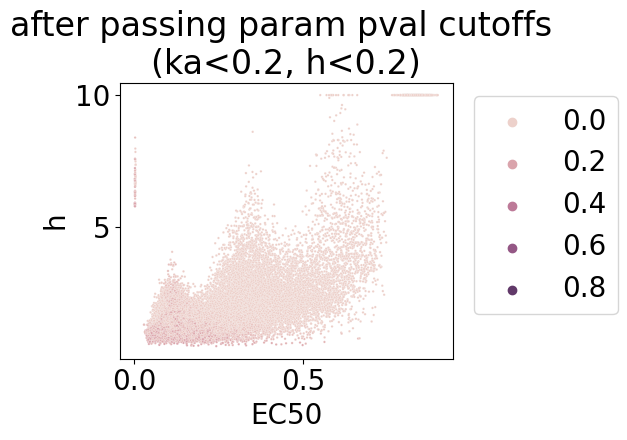

In [ ]:
subt = t[(t.h_pval < h_pval_cutoff) & (t.ka_pval<ka_pval_cutoff)]
p = sns.scatterplot(x=subt.ka,y=subt.h, hue=t["ka_pval"], s=3)
#plt.yscale("log")
plt.xlabel("EC50")
plt.title(f"after passing param pval cutoffs \n(ka<{ka_pval_cutoff}, h<{h_pval_cutoff})")
plt.legend(loc="upper left", bbox_to_anchor=(1.02,1))
plt.tight_layout()
p.figure.savefig(f"{plotdir}/test.pdf")

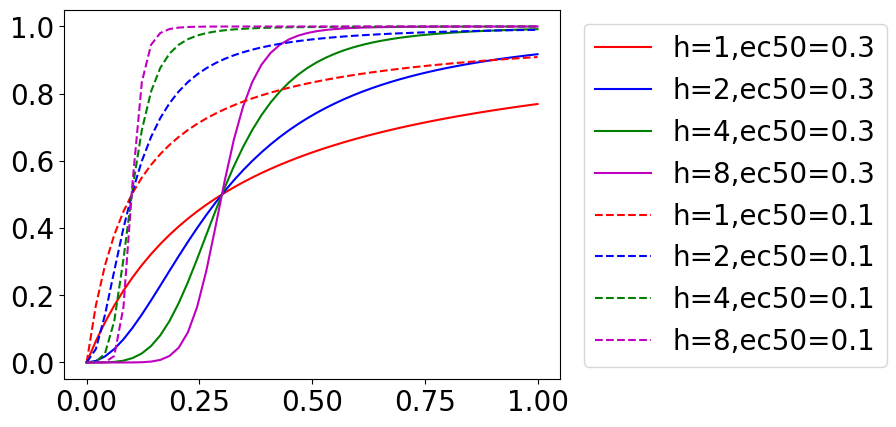

In [67]:
# plot some example hill curves
x = np.linspace(0, 1)
plt.plot(x, [func(i, 1, 0.3) for i in x], "r")
plt.plot(x, [func(i, 2, 0.3) for i in x], "b")
plt.plot(x, [func(i, 4, 0.3) for i in x], "g")
plt.plot(x, [func(i, 8, 0.3) for i in x], "m")
plt.plot(x, [func(i, 1, 0.1) for i in x], "r--")
plt.plot(x, [func(i, 2, 0.1) for i in x], "b--")
plt.plot(x, [func(i, 4, 0.1) for i in x], "g--")
plt.plot(x, [func(i, 8, 0.1) for i in x], "m--")
plt.legend(["h=1,ec50=0.3",
            "h=2,ec50=0.3",
            "h=4,ec50=0.3",
            "h=8,ec50=0.3",
            "h=1,ec50=0.1",
            "h=2,ec50=0.1",
            "h=4,ec50=0.1",
            "h=8,ec50=0.1"], loc="upper left", bbox_to_anchor=(1.02,1))

### plot some nonsensitive peaks

In [124]:
# or try plotting non de peaks
peaks = set(de.loc[(de["padj"] > 0.05) | (np.abs(de["log2FoldChange"]) < 0.58), "name"]) # only look at peaks that increase in accessibility
len(peaks)

487191

In [125]:
subset = qnorm_rpkm_df.loc[peaks, qnorm_rpkm_df.columns.str.contains(TF) | qnorm_rpkm_df.columns.str.contains("GFP")]
subset.columns = subset.columns.str.lstrip('X')
subset[pd.isna(subset)]=0
subset

/tmp/ipykernel_88563/3233971106.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  subset = qnorm_rpkm_df.loc[peaks, qnorm_rpkm_df.columns.str.contains(TF) | qnorm_rpkm_df.columns.str.contains("GFP")]


81_HEK293T_P1A12_GFP_d100  \
HEK293T_P3A2_OCT4_d100_peak_258092                    0.366624   
HEK293T_P3G3_KLF1_d075_peak_1158773                   5.132732   
HEK293T_P3B3_OCT4_d075_peak_203830                    0.000000   
HEK293T_P2C8_ALX4_d075_peak_74804                     0.000000   
HEK293T_P3H2_KLF1_d100_peak_592061                    1.466495   
...                                                        ...   
HEK293T_P2D9_ALX4_d050_peak_249358                    0.000000   
HEK293T_P2C5_LEF1_d025_peak_285941                    1.466495   
HEK293T_P3B3_OCT4_d075_peak_52611                     0.366624   
HEK293T_P2E10_TCF3_d025_peak_76355                    0.000000   
HEK293T_P1G8_IRF4_d075_peak_103369a                   0.000000   

                                     82_HEK293T_P1B12_GFP_d100  \
HEK293T_P3A2_OCT4_d100_peak_258092                    0.000000   
HEK293T_P3G3_KLF1_d075_peak_1158773                   2.349091   
HEK293T_P3B3_OCT4_d075_peak_203830                    0.391515   
HEK293T_P2C8_ALX4_d075_peak_74804                     0.391515   
HEK293T_P3H2_KLF1_d100_peak_592061                    2.544848   
...                                                        ...   
HEK293T_P2D9_ALX4_d050_peak_249358                    0.195758   
HEK293T_P2C5_LEF1_d025_peak_285941                    2.936363   
HEK293T_P3B3_OCT4_d075_peak_52611                     0.587273   
HEK293T_P2E10_TCF3_d025_peak_76355                    0.391515   
HEK293T_P1G8_IRF4_d075_peak_103369a                   0.391515   

                                     245_HEK293T_P2A12_GFP_d100  \
HEK293T_P3A2_OCT4_d100_peak_258092                     0.364494   
HEK293T_P3G3_KLF1_d075_peak_1158773                    5.102917   
HEK293T_P3B3_OCT4_d075_peak_203830                     0.000000   
HEK293T_P2C8_ALX4_d075_peak_74804                      0.000000   
HEK293T_P3H2_KLF1_d100_peak_592061                     2.186964   
...                                                         ...   
HEK293T_P2D9_ALX4_d050_peak_249358                     1.093482   
HEK293T_P2C5_LEF1_d025_peak_285941                     4.009435   
HEK293T_P3B3_OCT4_d075_peak_52611                      0.000000   
HEK293T_P2E10_TCF3_d025_peak_76355                     0.728988   
HEK293T_P1G8_IRF4_d075_peak_103369a                    0.364494   

                                     246_HEK293T_P2B12_GFP_d100  \
HEK293T_P3A2_OCT4_d100_peak_258092                     0.000000   
HEK293T_P3G3_KLF1_d075_peak_1158773                    3.314335   
HEK293T_P3B3_OCT4_d075_peak_203830                     0.828584   
HEK293T_P2C8_ALX4_d075_peak_74804                      0.000000   
HEK293T_P3H2_KLF1_d100_peak_592061                     1.104778   
...                                                         ...   
HEK293T_P2D9_ALX4_d050_peak_249358                     0.552389   
HEK293T_P2C5_LEF1_d025_peak_285941                     3.590529   
HEK293T_P3B3_OCT4_d075_peak_52611                      1.104778   
HEK293T_P2E10_TCF3_d025_peak_76355                     1.104778   
HEK293T_P1G8_IRF4_d075_peak_103369a                    0.276195   

                                     333_HEK293T_P3E2_KLF1_d100  \
HEK293T_P3A2_OCT4_d100_peak_258092                     0.000000   
HEK293T_P3G3_KLF1_d075_peak_1158773                    5.833489   
HEK293T_P3B3_OCT4_d075_peak_203830                     0.000000   
HEK293T_P2C8_ALX4_d075_peak_74804                      0.000000   
HEK293T_P3H2_KLF1_d100_peak_592061                     0.000000   
...                                                         ...   
HEK293T_P2D9_ALX4_d050_peak_249358                     0.833356   
HEK293T_P2C5_LEF1_d025_peak_285941                     0.833356   
HEK293T_P3B3_OCT4_d075_peak_52611                      0.833356   
HEK293T_P2E10_TCF3_d025_peak_76355                     0.000000   
HEK293T_P1G8_IRF4_d075_peak_103369a                    0.000000   

                                    

In [161]:
r_save = subset[col_order].rename(columns = dosage_dic)
pdf_raw = r_save.reset_index().melt(id_vars = "index").rename(columns={"variable": "dose", "value": "normalized peak count"})

In [169]:
tmp = subset[np.sum((subset>0) & (subset<2), axis=1) == subset.shape[1]] # closed
tmp = tmp.iloc[np.argsort(np.std(tmp,axis=1))]

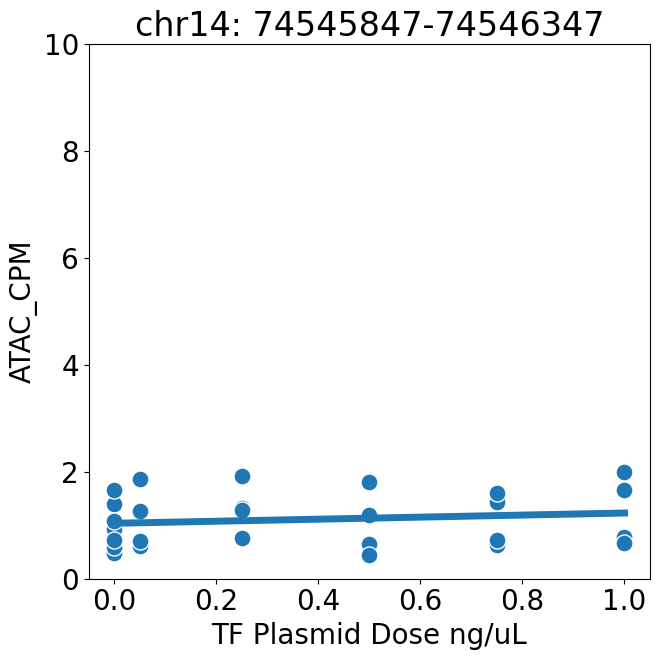

In [ ]:
titletexts = de.peakloc

for peak in tmp.index[:5]:
    df = pdf_raw[pdf_raw["index"] == peak]
    x = np.linspace(0, 1)

    # linear fit
    out, residuals, _, _, _ = np.polyfit(df["dose"].astype(float).values, 
                                        df["normalized peak count"].values, 1, full = True)

    titletext = peak
    if titletexts is not None:
        titletext = titletexts[peak]

    plt.figure(figsize=(7,7))
    matplotlib.rc("font",size=20)
    sns.scatterplot(data = df, x = "dose", y = "normalized peak count", s=150).set(title=titletext)
    plt.ylim(0,np.round(5*max(df["normalized peak count"].values)))
    #sns.lineplot(data = df, x = "dose", y = "normalized peak count", linewidth=5)
    plt.plot(x, [np.polyval([out[0], out[1]], i) for i in x], linewidth=5)

    plt.tight_layout()
    plt.ylabel("ATAC_CPM")
    plt.xlabel("TF Plasmid Dose ng/uL") 

plt.savefig(f"{plotdir}/example_peaks_nonsens_closed_{TF}.pdf")


In [172]:
tmp = subset[np.sum(subset>10, axis=1) == subset.shape[1]] # open 
tmp = tmp.iloc[np.argsort(np.std(tmp,axis=1))]

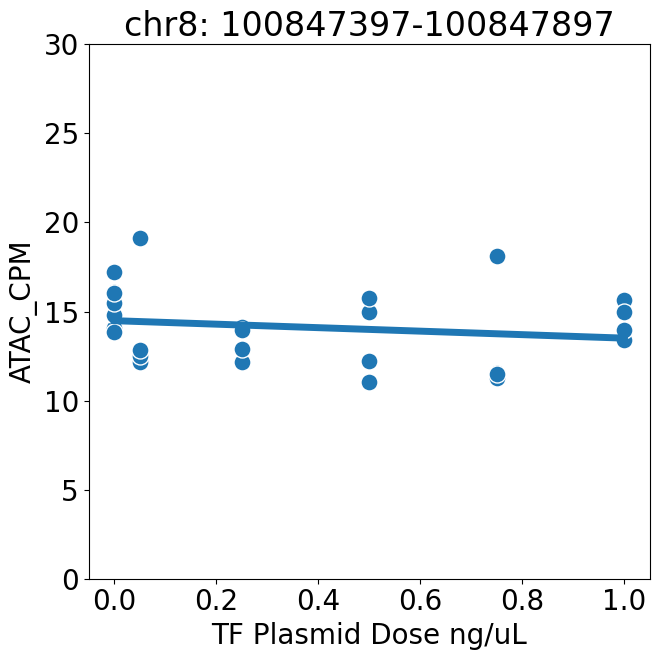

In [ ]:
titletexts = de.peakloc

# for peak in tmp.index[:5]:
for peak in tmp.index[:1]:
    df = pdf_raw[pdf_raw["index"] == peak]
    x = np.linspace(0, 1)

    # linear fit
    out, residuals, _, _, _ = np.polyfit(df["dose"].astype(float).values, 
                                        df["normalized peak count"].values, 1, full = True)

    titletext = peak
    if titletexts is not None:
        titletext = titletexts[peak]

    plt.figure(figsize=(7,7))
    matplotlib.rc("font",size=20)
    sns.scatterplot(data = df, x = "dose", y = "normalized peak count", s=150).set(title=titletext)
    # plt.ylim(0,np.round(5*max(df["normalized peak count"].values)))
    plt.ylim(0, 30)
    #sns.lineplot(data = df, x = "dose", y = "normalized peak count", linewidth=5)
    plt.plot(x, [np.polyval([out[0], out[1]], i) for i in x], linewidth=5)

    plt.tight_layout()
    plt.ylabel("ATAC_CPM")
    plt.xlabel("TF Plasmid Dose ng/uL") 

plt.savefig(f"{plotdir}/example_peaks_nonsens_open_{TF}.pdf")


### plot bigwig

In [ ]:
### plot bigwig
import pyBigWig
samples = ["GFP_d100", f"{TF}_d005", f"{TF}_d025", f"{TF}_d050", f"{TF}_d075", f"{TF}_d100"]
all_bw = {}
for s in samples:
    bw = pyBigWig.open(glob.glob(f"../../output/04-chrombpnet/output/models/fold_0/HEK293T_*{s}/auxiliary/data_unstranded.bw")[0])
    all_bw[s] = bw
import subprocess
DEPTH_VECTOR = []
counts_file = "../../output/01-preprocessing/output/bams/qc/compiled_counts.txt"
for s in samples:
    cmd = f"cat {counts_file}| grep {s} | awk '{{sum += $5}} END {{print sum}}'"
    DEPTH_VECTOR.append(int(subprocess.check_output(cmd, text=True, shell=True).strip()))

DEPTH_VECTOR = np.array(DEPTH_VECTOR)/1e6
print(DEPTH_VECTOR)
from scipy.interpolate import make_interp_spline
chrom = "chr3"
width = 1000
start = 380054 - width//2
end = start + width
binwidth = 10

g, d, c = init_grid((len(samples),1), (6,2))
for i in reversed(range(len(samples))):
    s = samples[i]
    bw = all_bw[s]
    values = bw.values(chrom, start, end)
    x = np.array(range(start, end))
    y = np.array(values/DEPTH_VECTOR[i])
    y[np.isnan(y)] = 0
    # Plot the values
    plt.subplot(*g, next(c))
    # sns.lineplot(x=range(start, end), y=values/DEPTH_VECTOR[i])
    x_smooth = np.linspace(x.min(), x.max(), width//binwidth)
    y_smooth = make_interp_spline(x, y)(x_smooth)
    plt.plot(x_smooth, y_smooth, color="blue", label=s)
    plt.xticks([])
    plt.xlabel("")
    plt.ylabel("")
    plt.ylim([0, 0.03])
    plt.legend()
    
plt.suptitle(f"{chrom}:{start}-{end}")
plt.ylabel("ATAC CPM")
plt.tight_layout()
plt.legend()
plt.show()